<a href="https://colab.research.google.com/github/Sixcharcoin/IntDS1/blob/main/Gp_2_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#==============================================================
# 1. Data Manipulation Libraries
# ==============================================================
import numpy as np
import pandas as pd
import os

# ==============================================================
# 2. Data Visualization Libraries
# ==============================================================
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================================================
# 3. Data Preprocessing and Analysis
# ==============================================================
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, fbeta_score, f1_score, recall_score, precision_score

# ==============================================================
# 4. Machine Learning - Models and Evaluation
# ==============================================================
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Data splitting
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Evaluation metrics
from sklearn.metrics import accuracy_score, fbeta_score, r2_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv(r'D:\Progamming\program-25 spring\Group_Project_2\weather_classification_data.csv')

# EDA

In [ ]:
df.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

In [ ]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


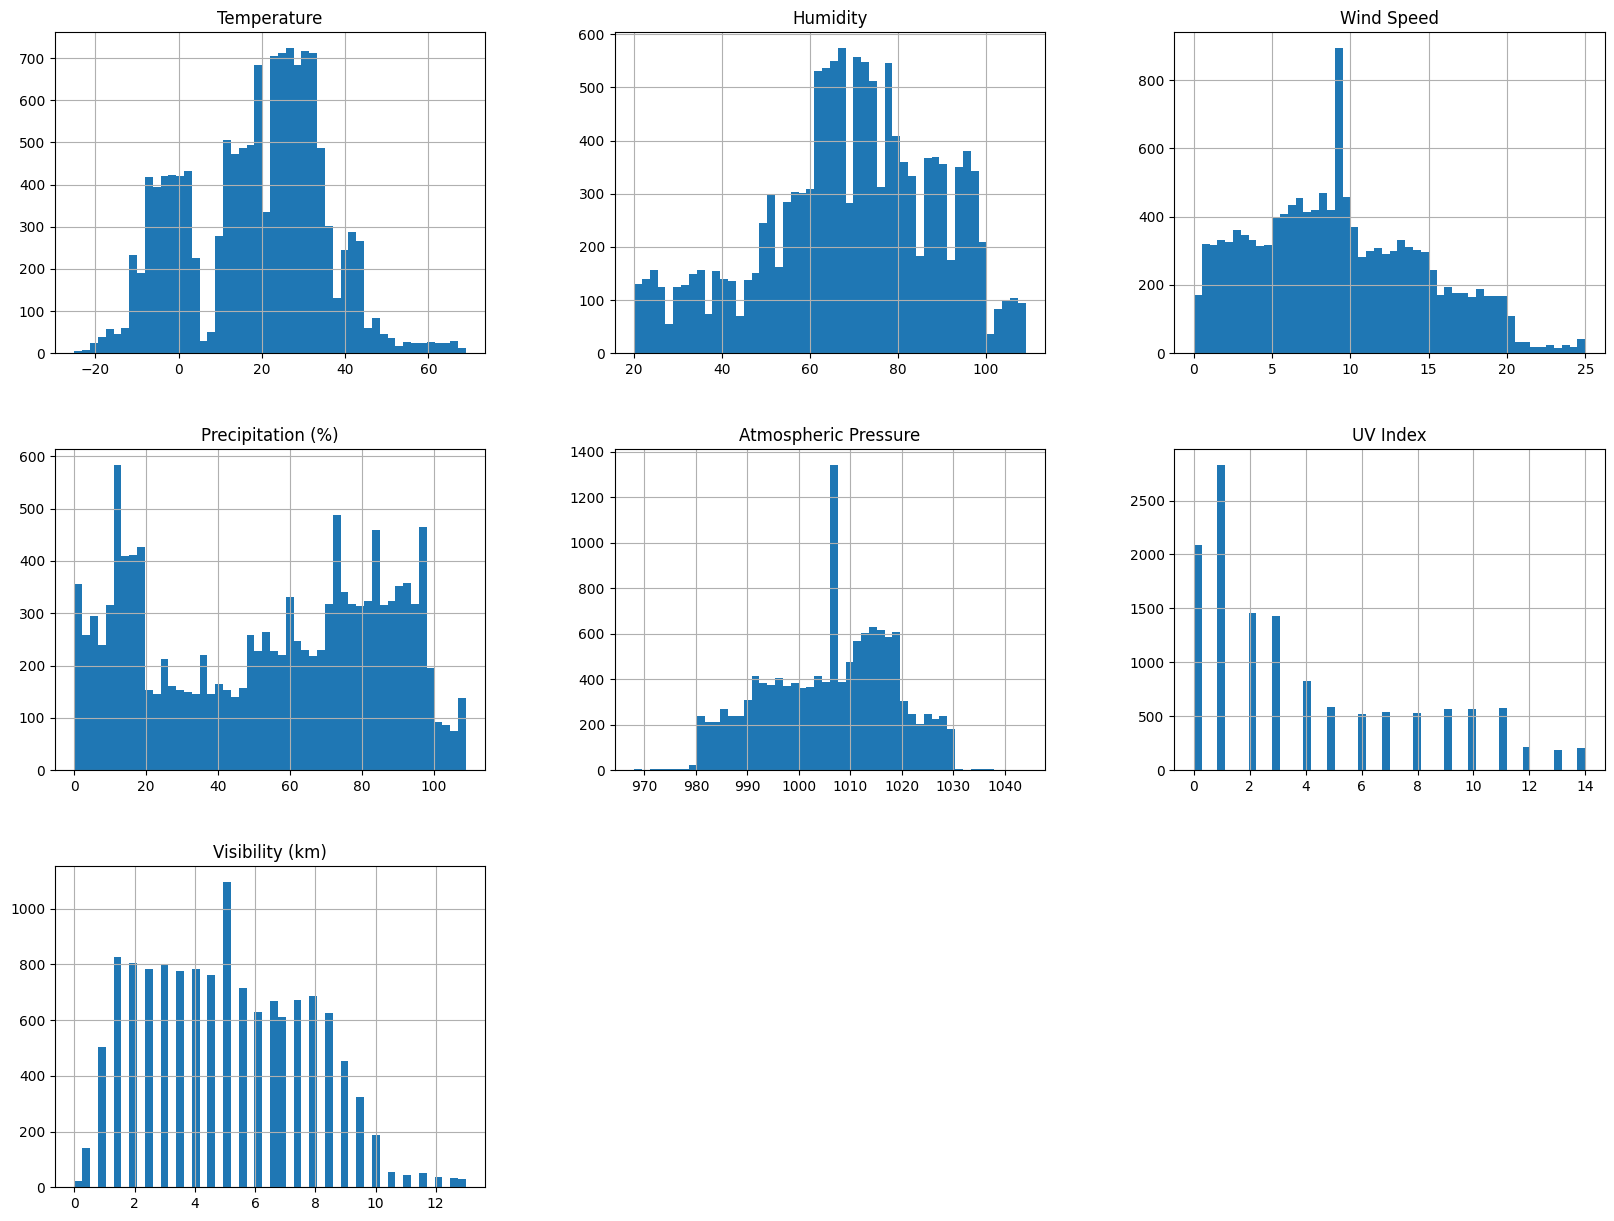

In [ ]:
# Check the distributions of selected independent variables
df.hist(column=[ 'Temperature', 'Humidity','Wind Speed', 'Precipitation (%)',
       'Cloud Cover','Atmospheric Pressure','UV Index',
       'Visibility (km)'], bins=50, figsize=(20,15))

import matplotlib.pyplot as plt

plt.show();

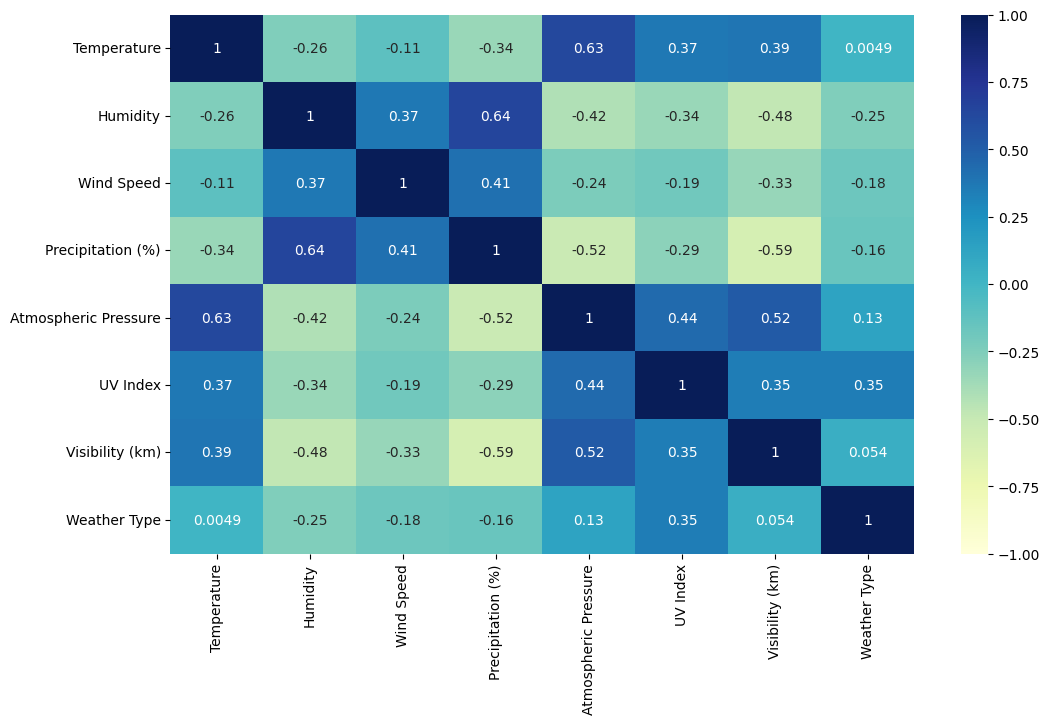

In [ ]:
# Creating a heatmap for numerical data
# Select numerical data
import numpy as np
num_cols = df.select_dtypes(include=np.number)

# Plot the correlation heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(data=num_cols.corr(), annot=True, vmin=-1, vmax=1, cmap='YlGnBu')
plt.show()

#Findings: no particularly strong correlations among (numerical) variables.
#Exceptionally, humidity and precipitation show a strong relationship but.. that's kind of common knowledge.

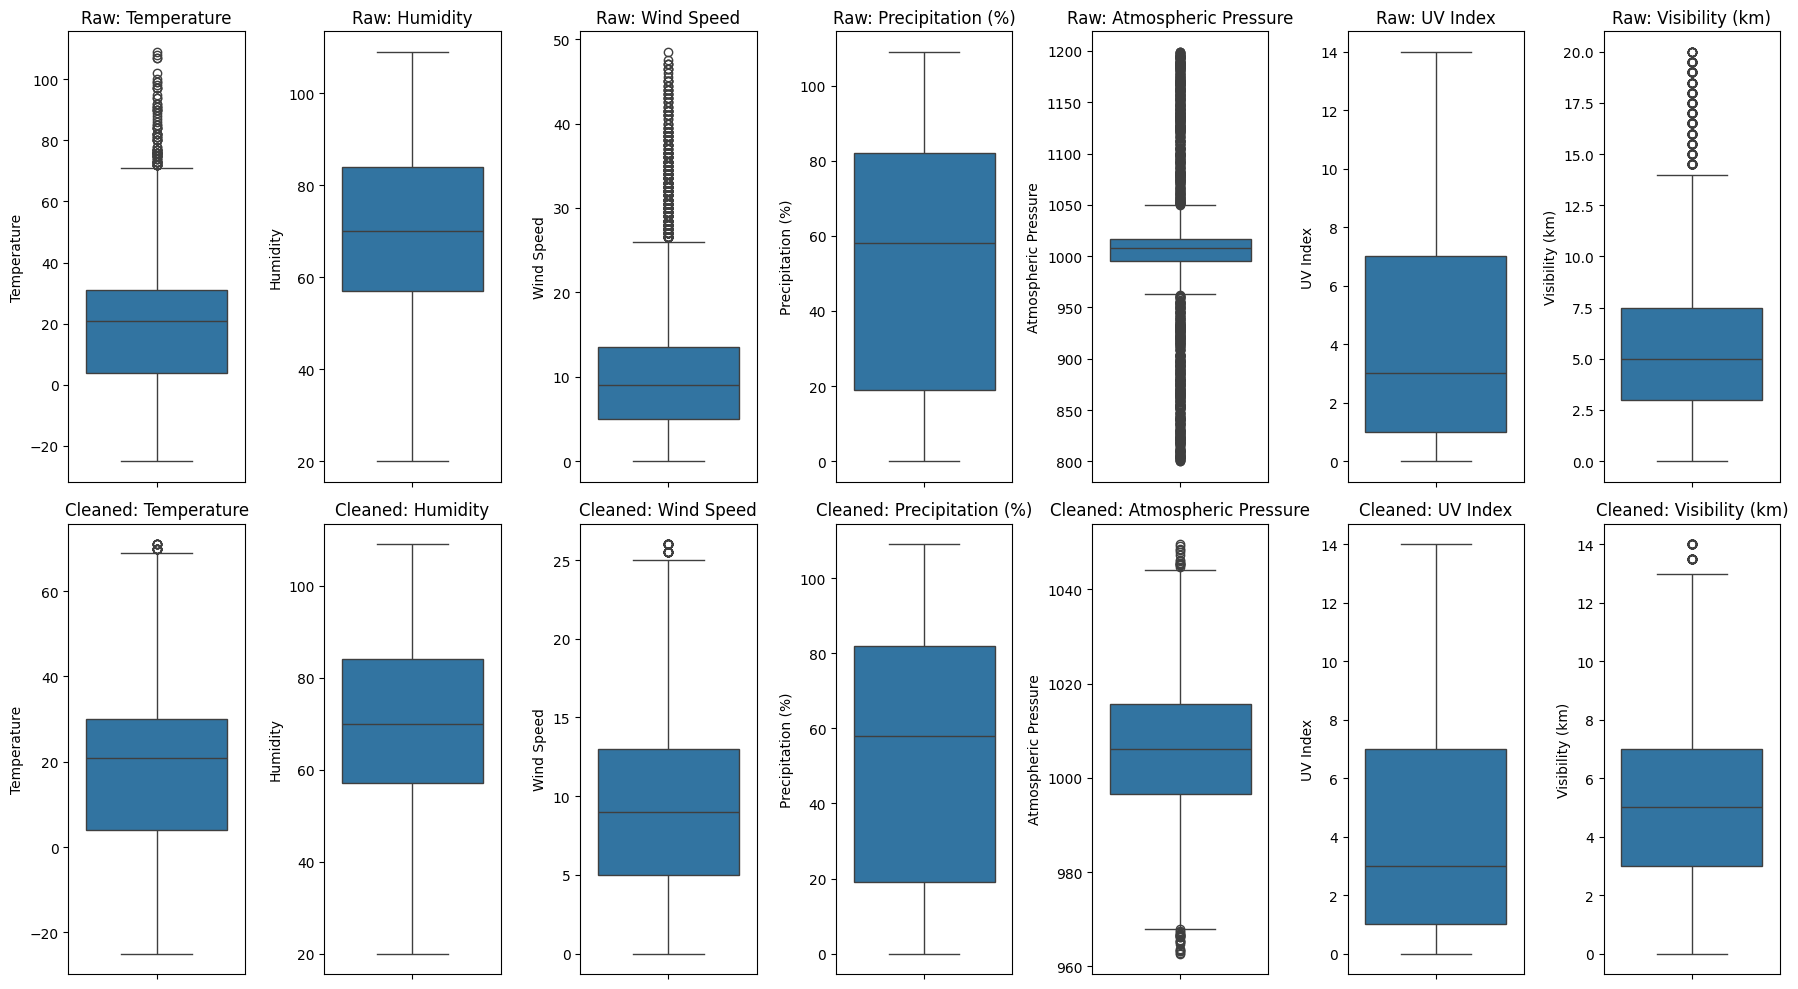

In [ ]:
# Compare boxplots before and after data cleaning
# Read the original data
raw_df = pd.read_csv(r'D:\Progamming\program-25 spring\Group_Project_2\weather_classification_data.csv')

# Select numerical features
num_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

plt.figure(figsize=(18, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols), i+1)
    sns.boxplot(y=raw_df[col])
    plt.title(f'Raw: {col}')
    plt.subplot(2, len(num_cols), i+1+len(num_cols))
    sns.boxplot(y=df[col])
    plt.title(f'Cleaned: {col}')
plt.tight_layout()
plt.show()

# Data Cleaning

In [ ]:
def remove_outliers(df):
    cleaned_df = df.copy()
    for col in cleaned_df.columns:
        if cleaned_df[col].dtype in ['float64', 'int64']:

            Q1 = cleaned_df[col].quantile(0.25)
            Q3 = cleaned_df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_limit = Q1 - 1.5 * IQR
            upper_limit = Q3 + 1.5 * IQR

            cleaned_df[col] = cleaned_df[col].apply(
                lambda x: x if pd.isnull(x) or (lower_limit <= x <= upper_limit) else None
            )

    return cleaned_df

df = remove_outliers(df)

### Explanation: Data Cleaning Workflow

The previous step (Cell 10) used the `remove_outliers` function to replace outliers in numerical features with `None` (i.e., missing values).  
The next step (Cell 13) uses the `replace_nulls` function to fill all missing values:
- Numerical features are filled with the mean
- Categorical features are filled with the mode

This ensures that the data is free of outliers and missing values, making it suitable for subsequent modeling and analysis.

In [ ]:
def replace_nulls(df):
    for column in df.columns:
        if column not in df.columns:
            print(f"Column '{column}' not found in DataFrame. Skipping...")
            continue
        if df[column].dtype == 'object':                   # Categorical column
            mode = df[column].mode()[0]                    # Calculate mode
            df[column] = df[column].fillna(mode)
        else:                                              # Numeric column
            mean = df[column].mean()                       # Calculate mean
            df[column] = df[column].fillna(mean)
    return df

df = replace_nulls(df)

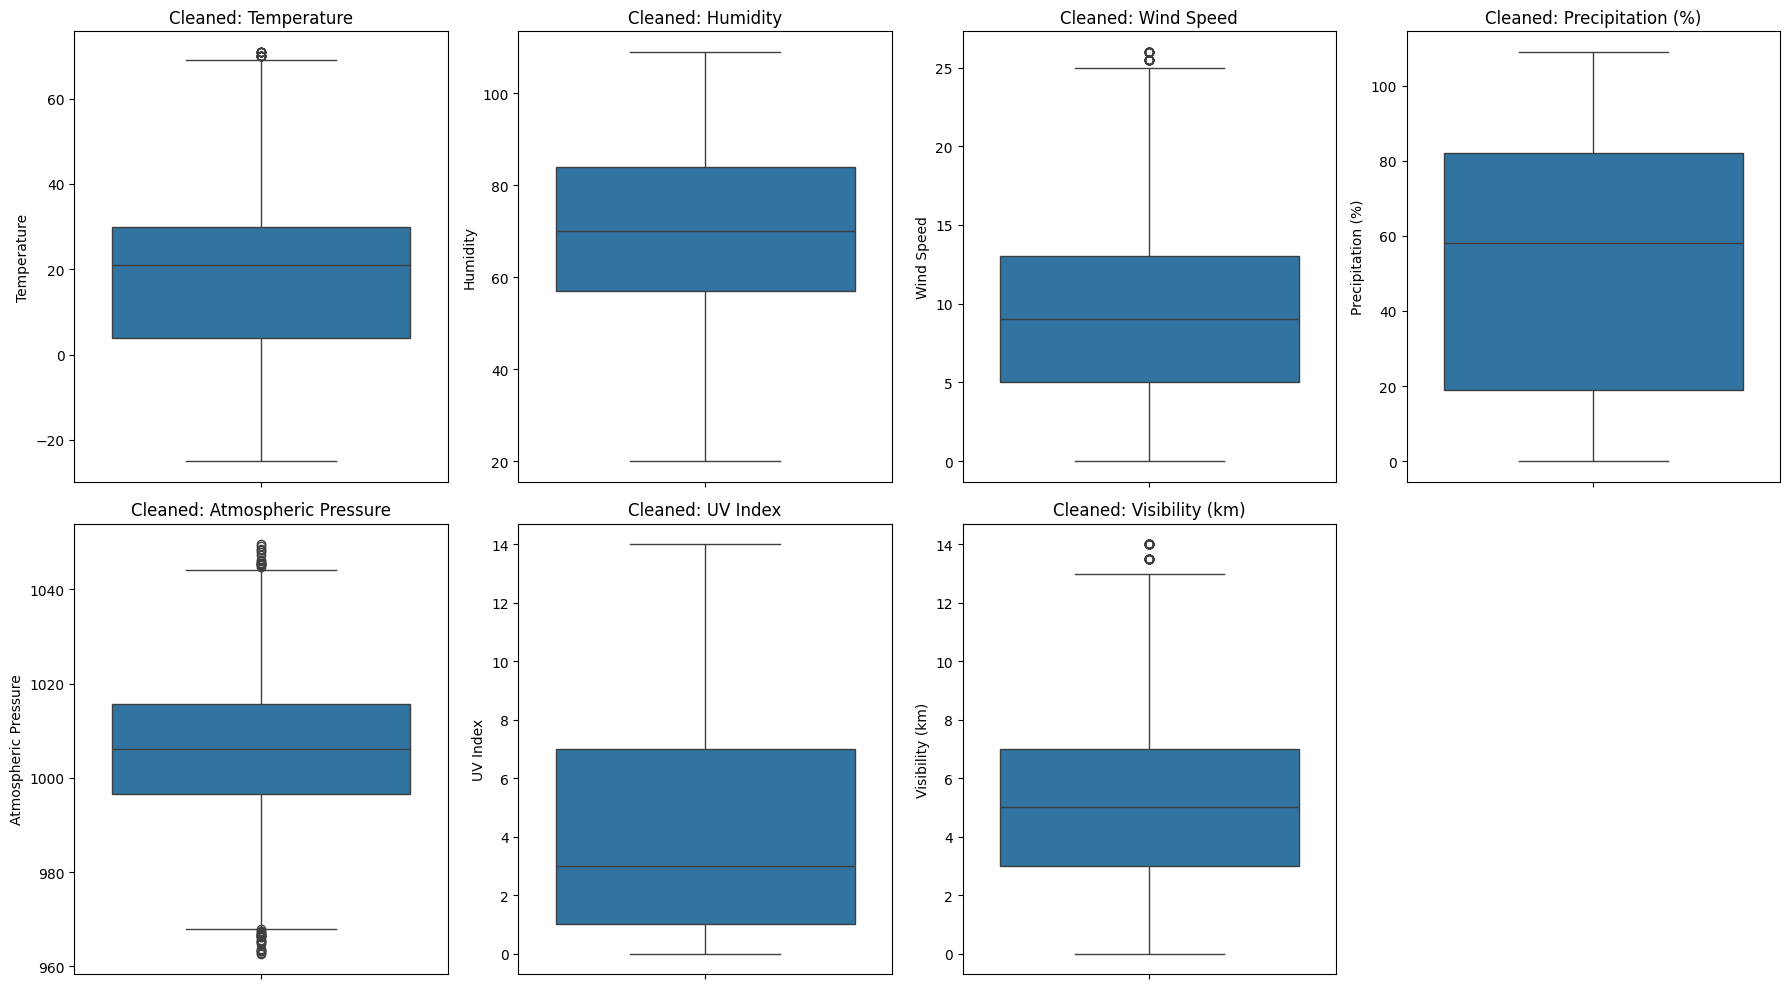

In [ ]:
# Visualize the distribution of numerical features after removing outliers
plt.figure(figsize=(18, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols)//2 + len(num_cols)%2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Cleaned: {col}')
plt.tight_layout()
plt.show()

# Data Processing

In [ ]:
label_encoder = LabelEncoder()
df['Weather Type'] = label_encoder.fit_transform(df['Weather Type'])

In [ ]:
numerical_cols = df.select_dtypes(include ='number').columns
categorical_cols = df.select_dtypes(exclude ='number').columns

In [ ]:
df_dummies = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
X = df_dummies.drop('Weather Type', axis=1)
y = df_dummies['Weather Type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10560, 15)
(2640, 15)
(10560,)
(2640,)


# Machine Learning——Decision Tree

In [ ]:
# Create a decision tree classifier
dtree = DecisionTreeClassifier(random_state=314)

Accuracy: 0.9090909090909091


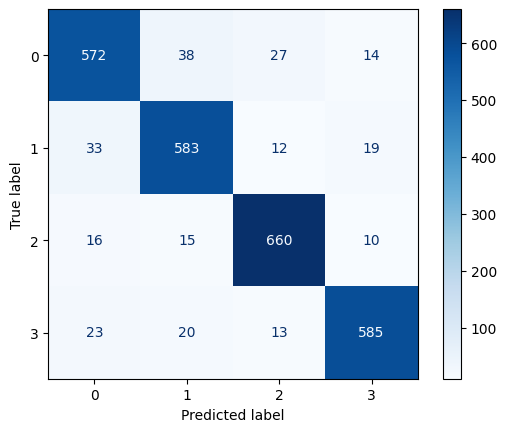

In [ ]:
# Train the decision tree model
dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtree.predict(X_test)

# Output accuracy and confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(
    dtree, X_test, y_test, cmap=plt.cm.Blues
)
plt.show()

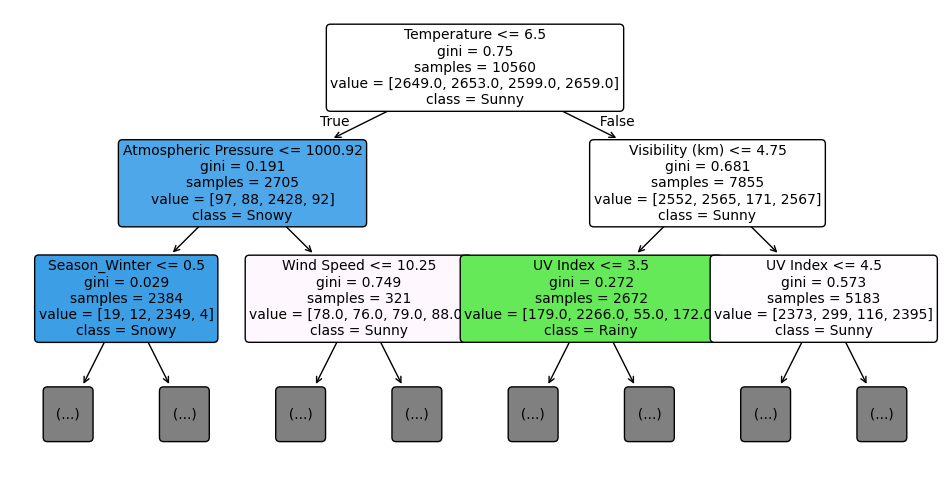

In [ ]:
from sklearn import tree

plt.figure(figsize=(12, 6))
tree.plot_tree(
    dtree,
    feature_names=X.columns,
    class_names=[str(cls) for cls in label_encoder.classes_],
    filled=True,
    rounded=True,
    max_depth=2,  # 只显示前2层
    fontsize=10
)
plt.show()


In [ ]:
# Output some parameters of the decision tree
print("Decision tree max depth:", dtree.get_depth())
print("Number of leaf nodes:", dtree.get_n_leaves())
print("Total number of nodes:", dtree.tree_.node_count)
print("Number of features:", dtree.n_features_in_)
print("Feature indices used for splitting:", dtree.tree_.feature)

Decision tree max depth: 22
Number of leaf nodes: 614
Total number of nodes: 1227
Number of features: 15
Feature indices used for splitting: [ 0  4 12 ... -2 -2 -2]


In [ ]:
# Training set accuracy
train_acc = dtree.score(X_train, y_train)
# Test set accuracy
test_acc = dtree.score(X_test, y_test)

print(f"Training set accuracy: {train_acc:.4f}")
print(f"Test set accuracy: {test_acc:.4f}")
if train_acc - test_acc > 0.1:
    print("The model may be overfitting.")
else:
    print("There is no obvious overfitting in the model.")

Training set accuracy: 1.0000
Test set accuracy: 0.9091
There is no obvious overfitting in the model.


# Machine Learning——GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create decision tree classifier
dtree_gs = DecisionTreeClassifier(random_state=314)

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(dtree_gs, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output the best parameters and performance on the test set
print("Best parameters:", grid_search.best_params_)
print("Best training accuracy (CV):", grid_search.best_score_)
print("Test set accuracy:", grid_search.score(X_test, y_test))

# Explanation of differences with dtree
print(
    "\nDifferences:\n"
    "1. GridSearchCV automatically searches multiple parameter combinations using cross-validation to select the optimal model, reducing the subjectivity of manual tuning.\n"
    "2. dtree is trained directly with default or single parameters, which may not be optimal.\n"
    "3. GridSearchCV can effectively prevent overfitting and improve model generalization."
)

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best training accuracy (CV): 0.9090909090909092
Test set accuracy: 0.9026515151515152

Differences:
1. GridSearchCV automatically searches multiple parameter combinations using cross-validation to select the optimal model, reducing the subjectivity of manual tuning.
2. dtree is trained directly with default or single parameters, which may not be optimal.
3. GridSearchCV can effectively prevent overfitting and improve model generalization.


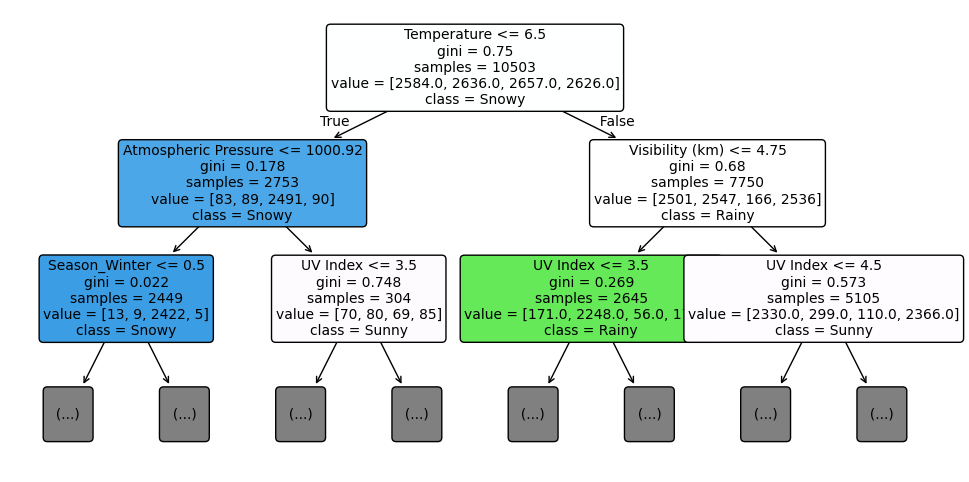

In [ ]:
from sklearn import tree

plt.figure(figsize=(12, 6))
tree.plot_tree(
    grid_search.best_estimator_,
    feature_names=X.columns,
    class_names=[str(cls) for cls in label_encoder.classes_],
    filled=True,
    rounded=True,   # Only show the first 2 layers
    fontsize=10
)
plt.show()


# Machine Learning——Regression Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Use a regression tree (DecisionTreeRegressor) to perform regression analysis on Weather Type

# Create regression tree model
reg_tree = DecisionTreeRegressor(random_state=314)
reg_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_reg = reg_tree.predict(X_test)

# Since Weather Type is a categorical variable, the regression tree predicts continuous values.
# You can round the predictions and compare them with the true labels.

mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)
print(f"Regression Tree MSE: {mse:.4f}")
print(f"Regression Tree R2: {r2:.4f}")

# Round the predictions to integer categories
y_pred_reg_rounded = np.round(y_pred_reg).astype(int)
acc_reg = accuracy_score(y_test, y_pred_reg_rounded)
print(f"Regression Tree rounded classification accuracy: {acc_reg:.4f}")

print(
    "\nExplanation of differences:\n"
    "1. Classification trees (DecisionTreeClassifier) directly predict class labels and are suitable for discrete target variables.\n"
    "2. Regression trees (DecisionTreeRegressor) predict continuous values and are suitable for continuous targets. For classification, the output needs to be rounded.\n"
    "3. When using regression trees for classification problems, the accuracy is usually lower than that of dedicated classification trees.\n"
    "4. Classification trees can directly output confusion matrices and other classification metrics, while regression trees mainly output MSE, R2, and other regression metrics."
)

Regression Tree MSE: 0.3231
Regression Tree R2: 0.7370
Regression Tree rounded classification accuracy: 0.9061

Explanation of differences:
1. Classification trees (DecisionTreeClassifier) directly predict class labels and are suitable for discrete target variables.
2. Regression trees (DecisionTreeRegressor) predict continuous values and are suitable for continuous targets. For classification, the output needs to be rounded.
3. When using regression trees for classification problems, the accuracy is usually lower than that of dedicated classification trees.
4. Classification trees can directly output confusion matrices and other classification metrics, while regression trees mainly output MSE, R2, and other regression metrics.


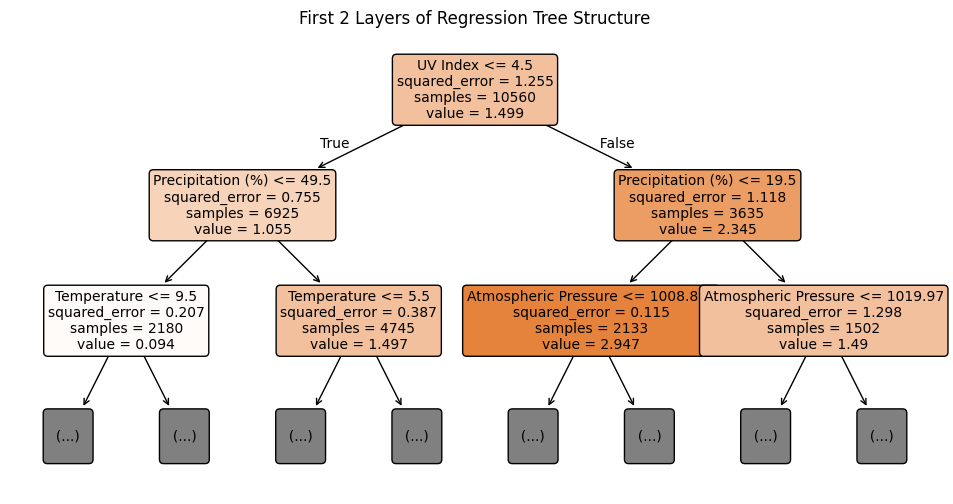

In [ ]:
from sklearn import tree

# Visualize the first 2 layers of the regression tree structure
plt.figure(figsize=(12, 6))
tree.plot_tree(
    reg_tree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    max_depth=2,  # Only show the first 2 layers
    fontsize=10
)
plt.title("First 2 Layers of Regression Tree Structure")
plt.show()

# Machine Learning——Ensemble Learning

## XGBoost

XGBoost regression mean squared error: 0.1941
XGBoost regression rounded classification accuracy: 0.8867


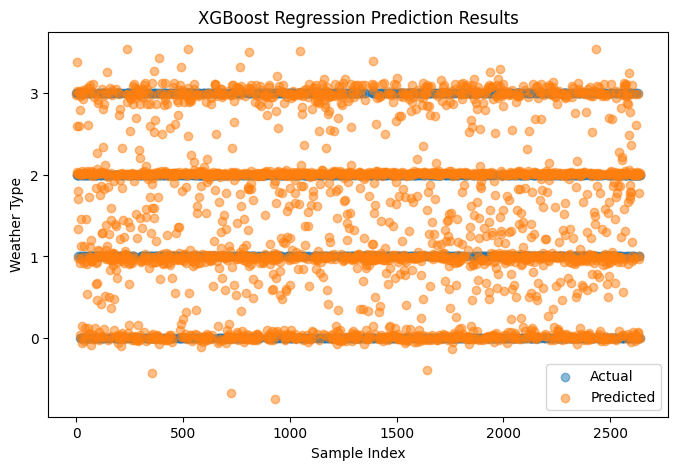

d:\ana\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


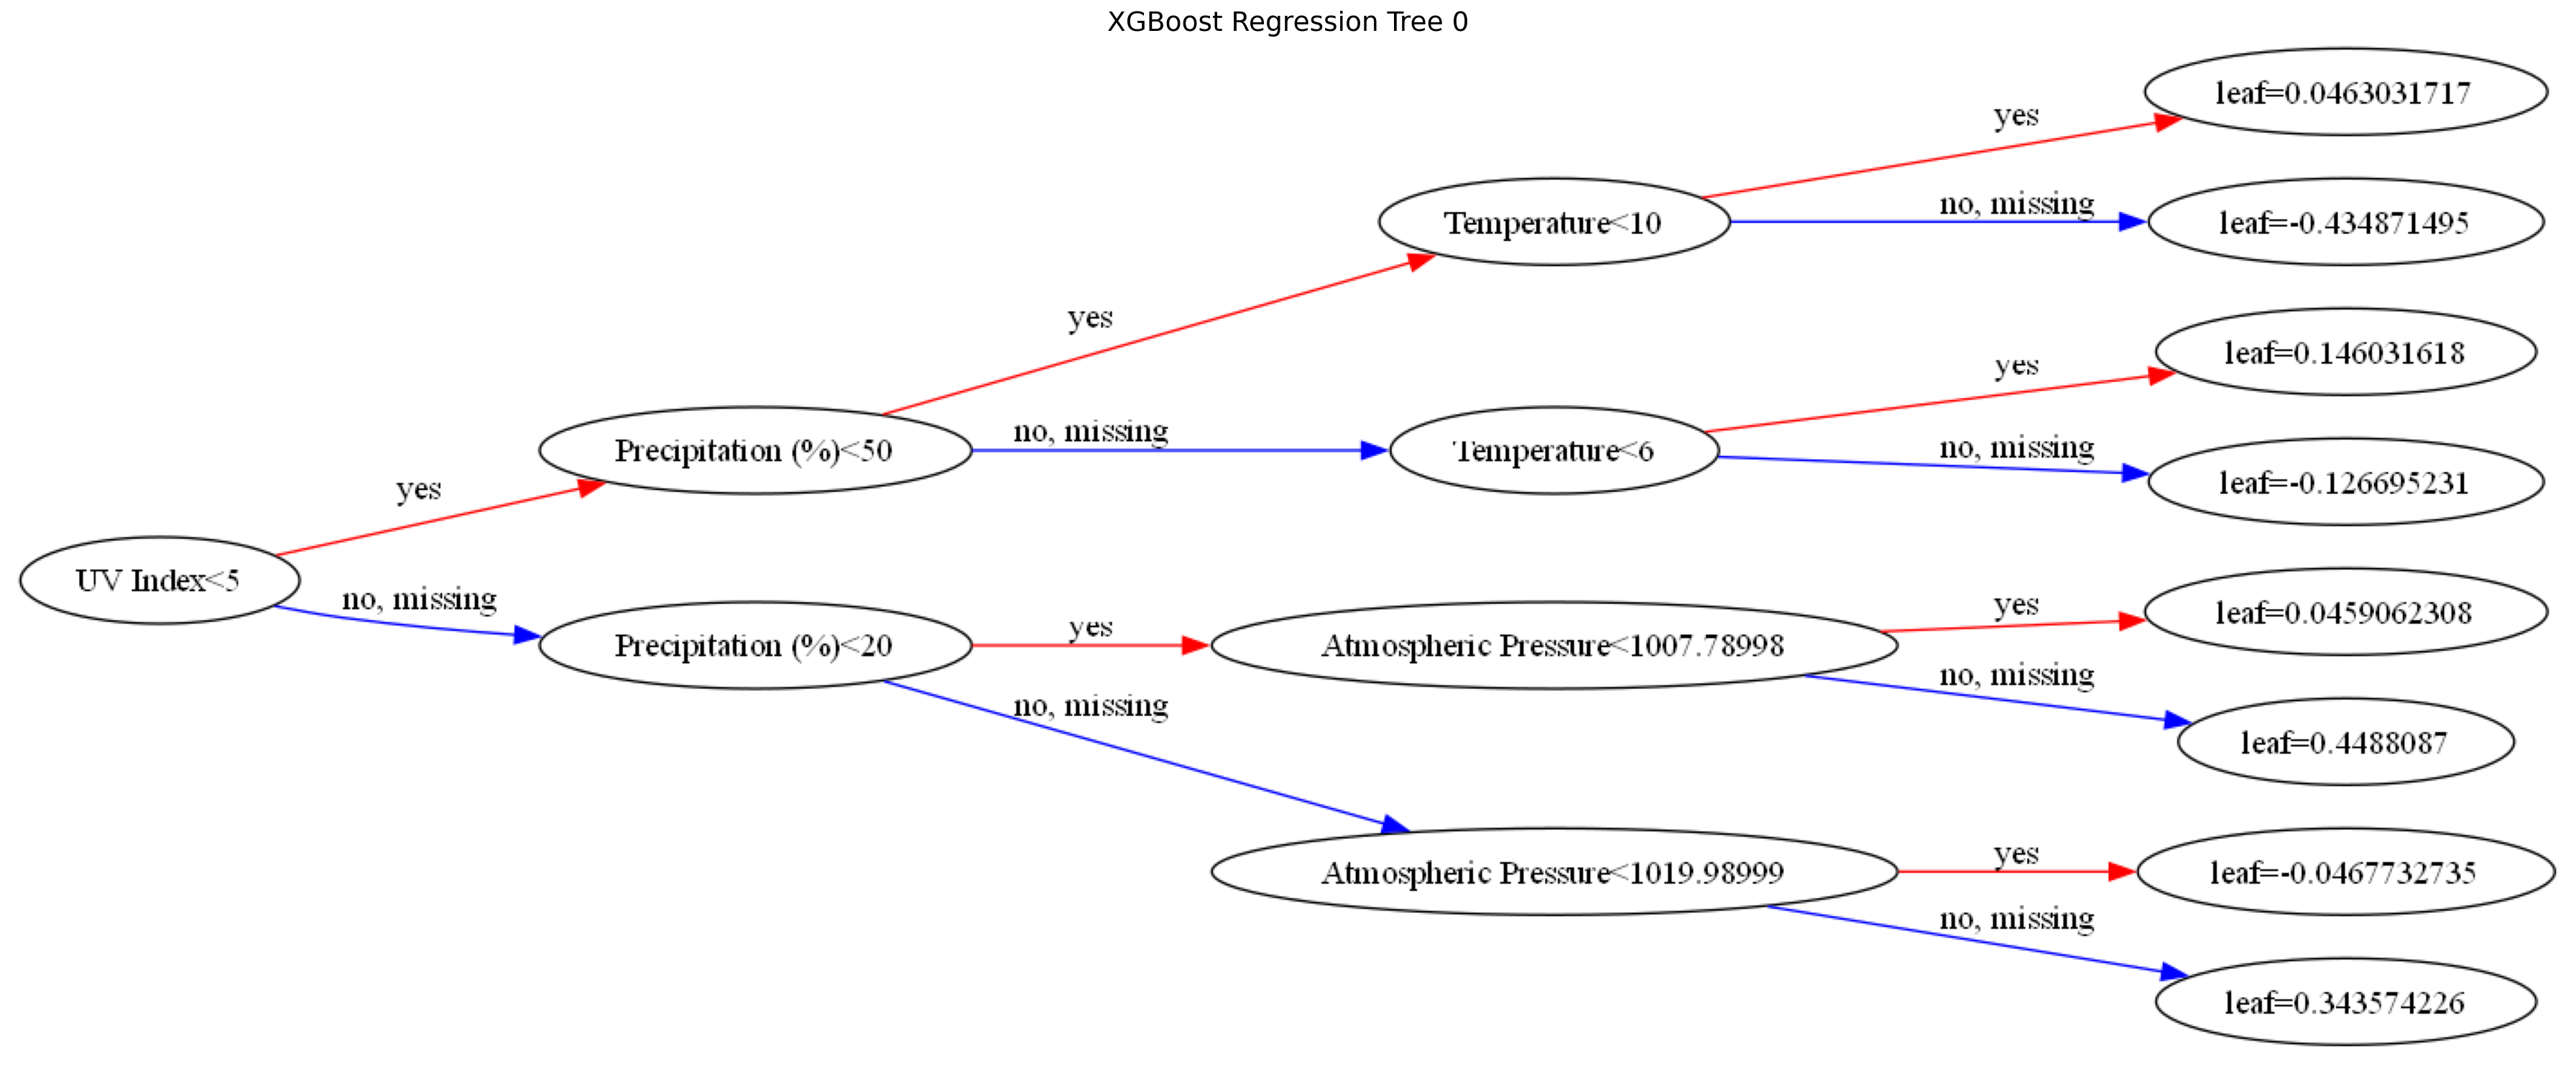

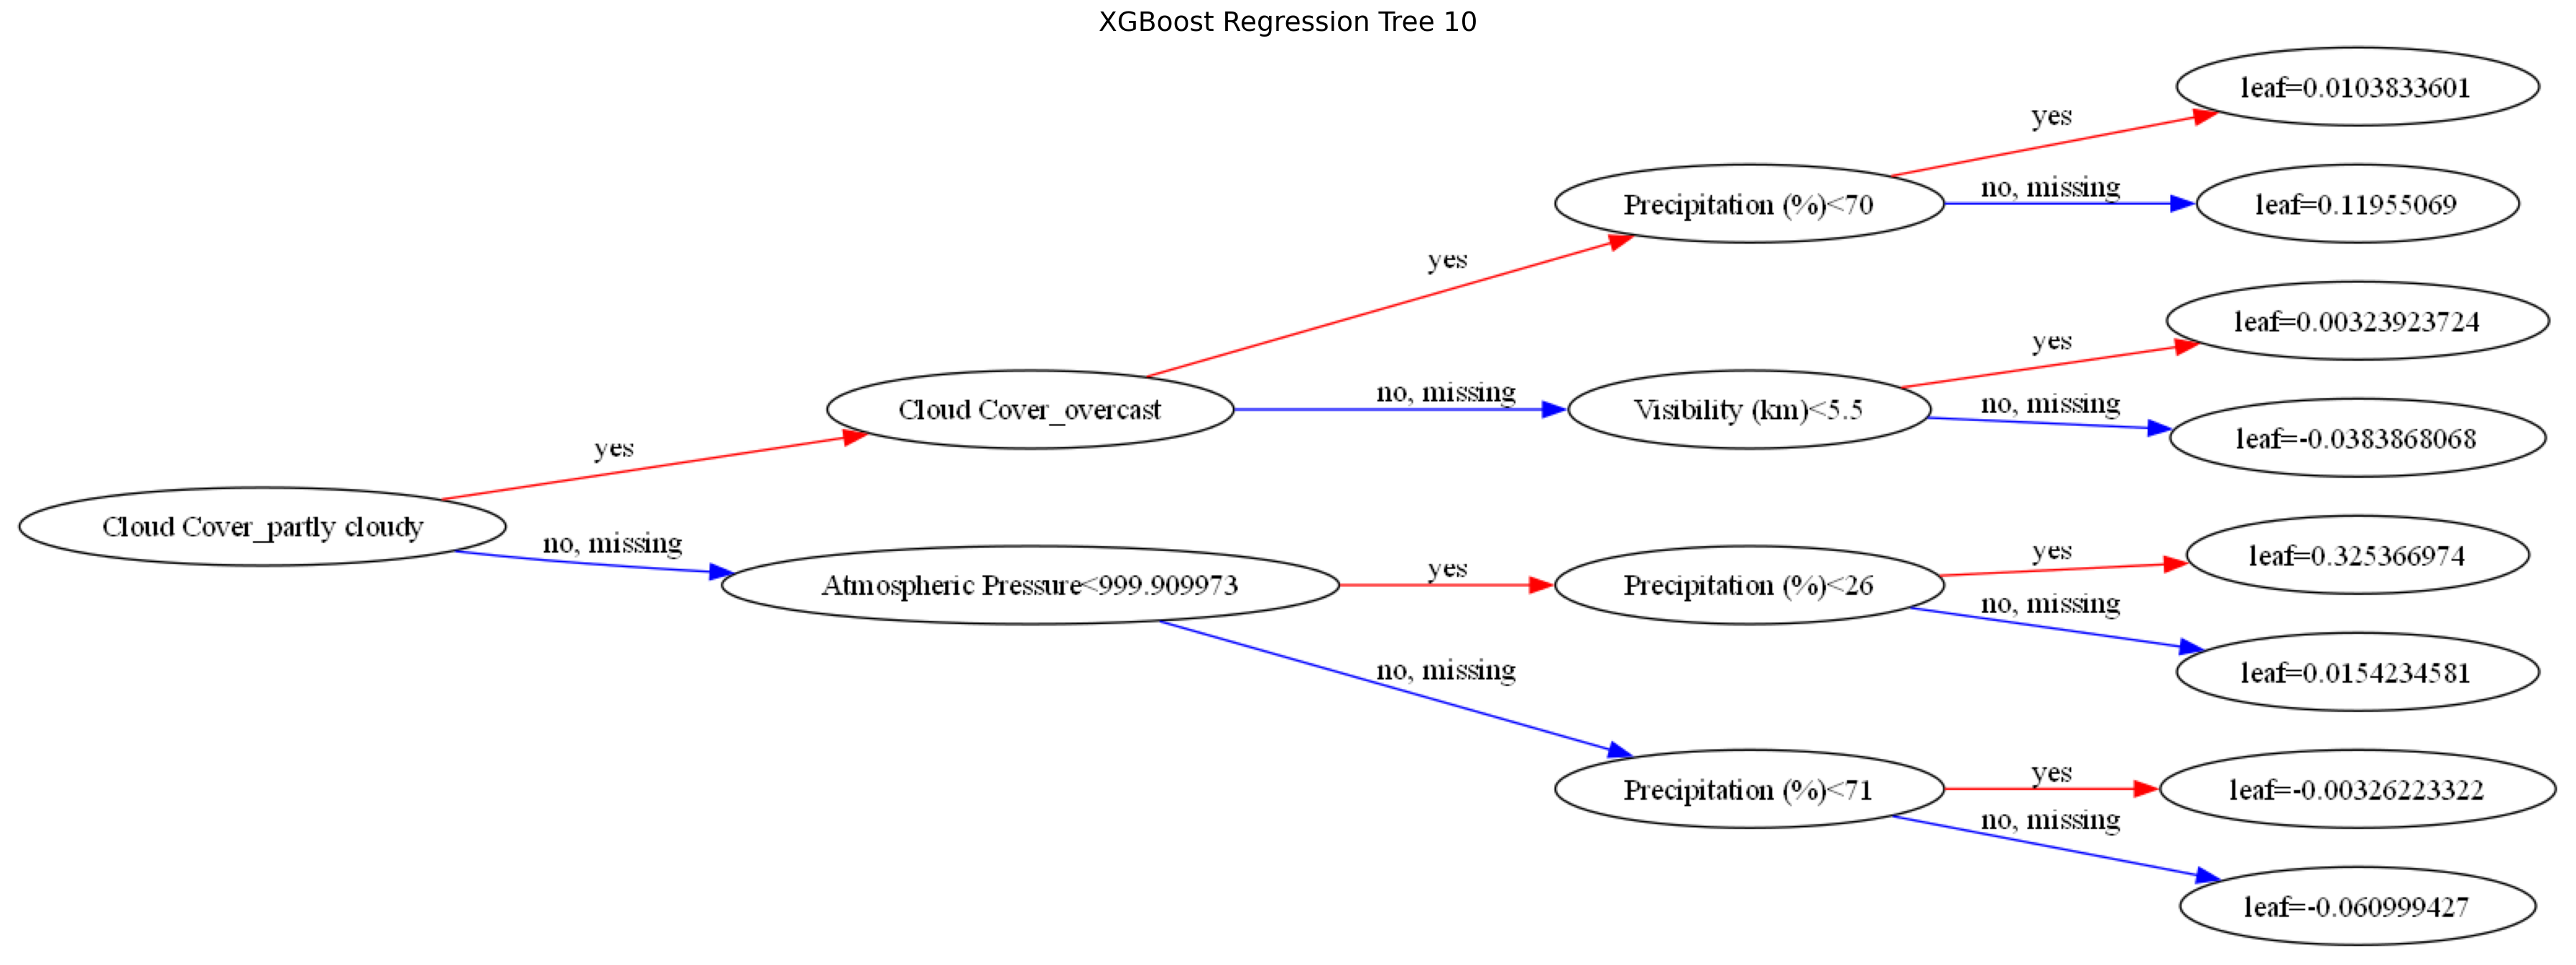

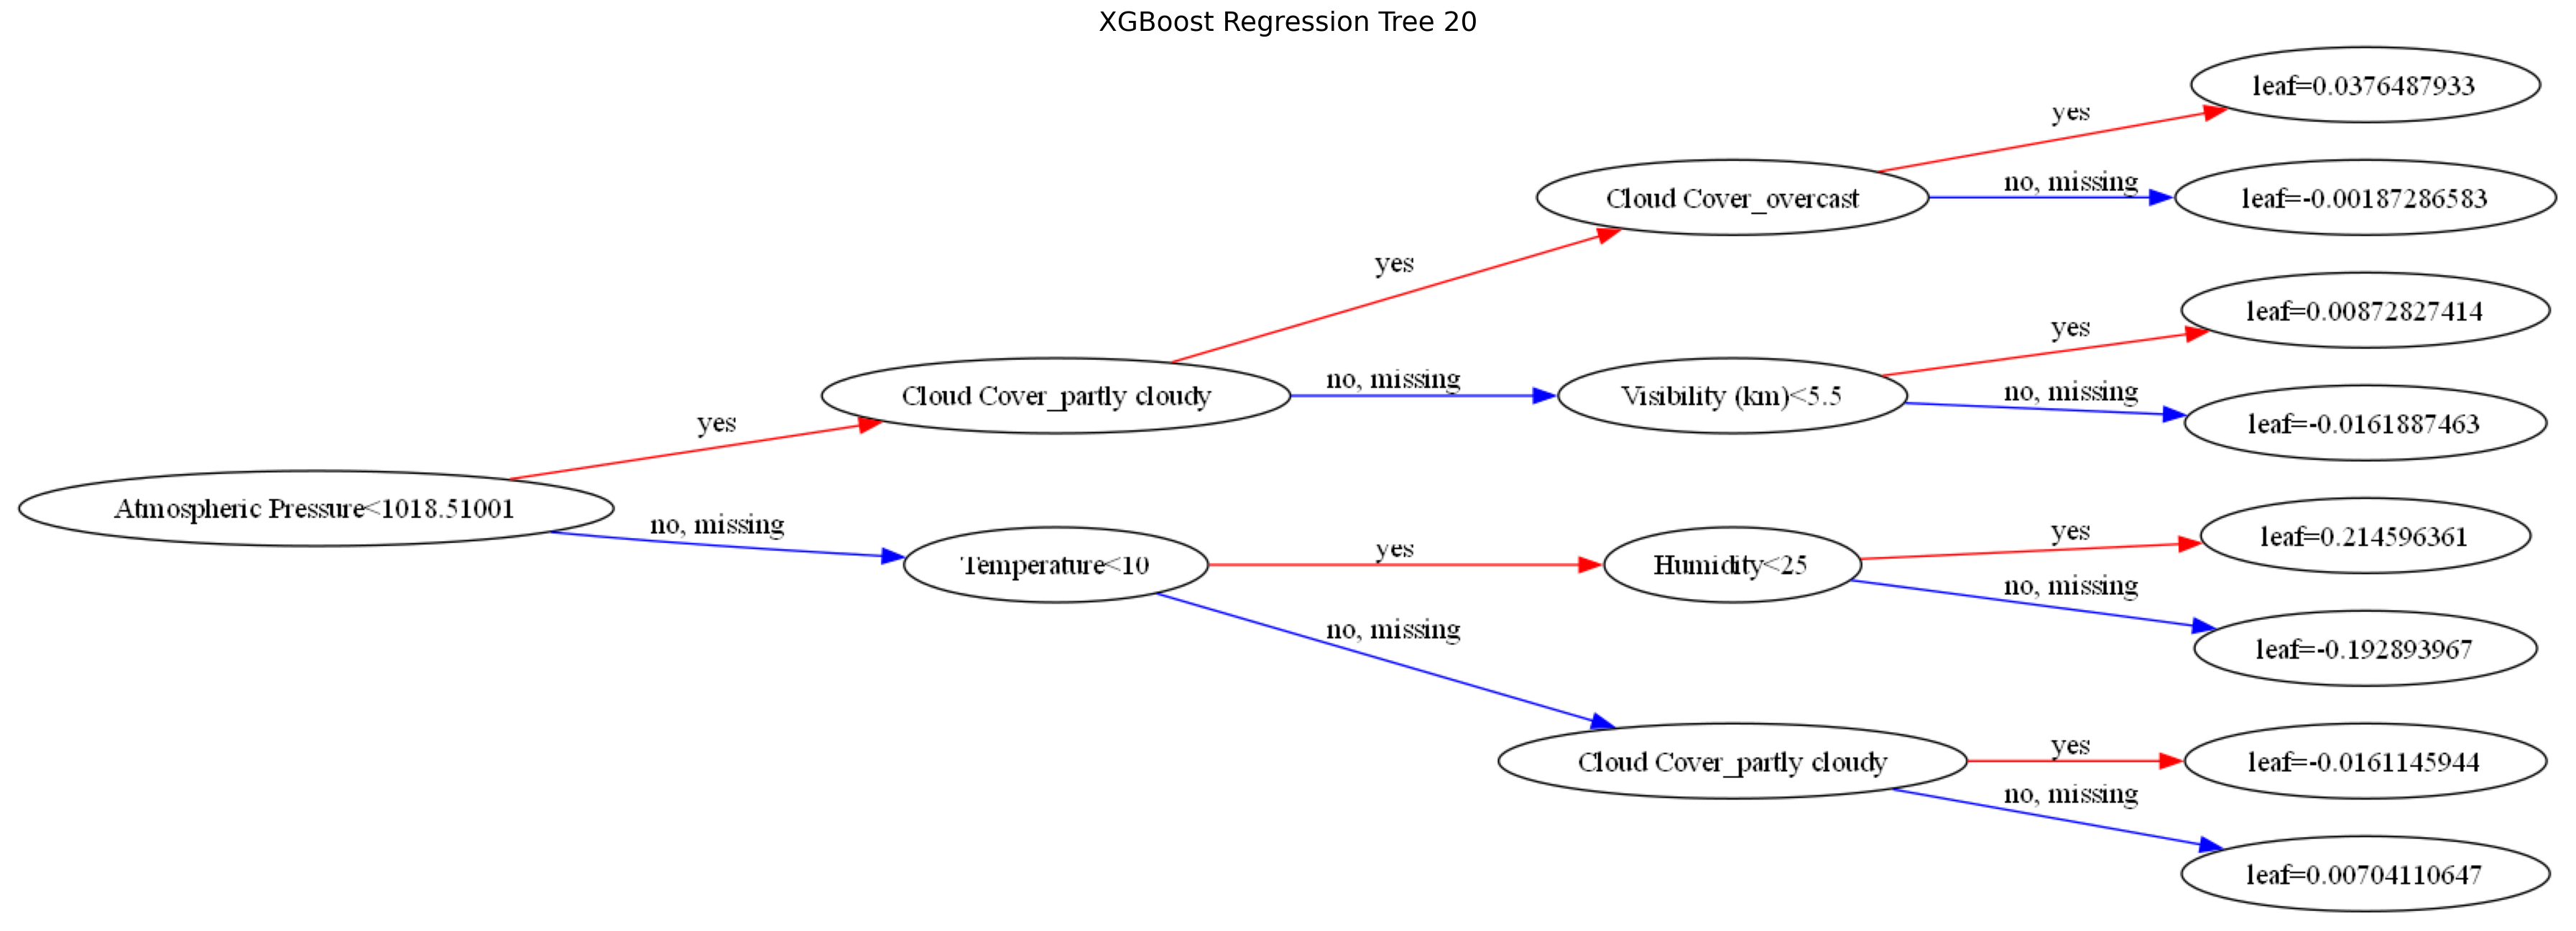

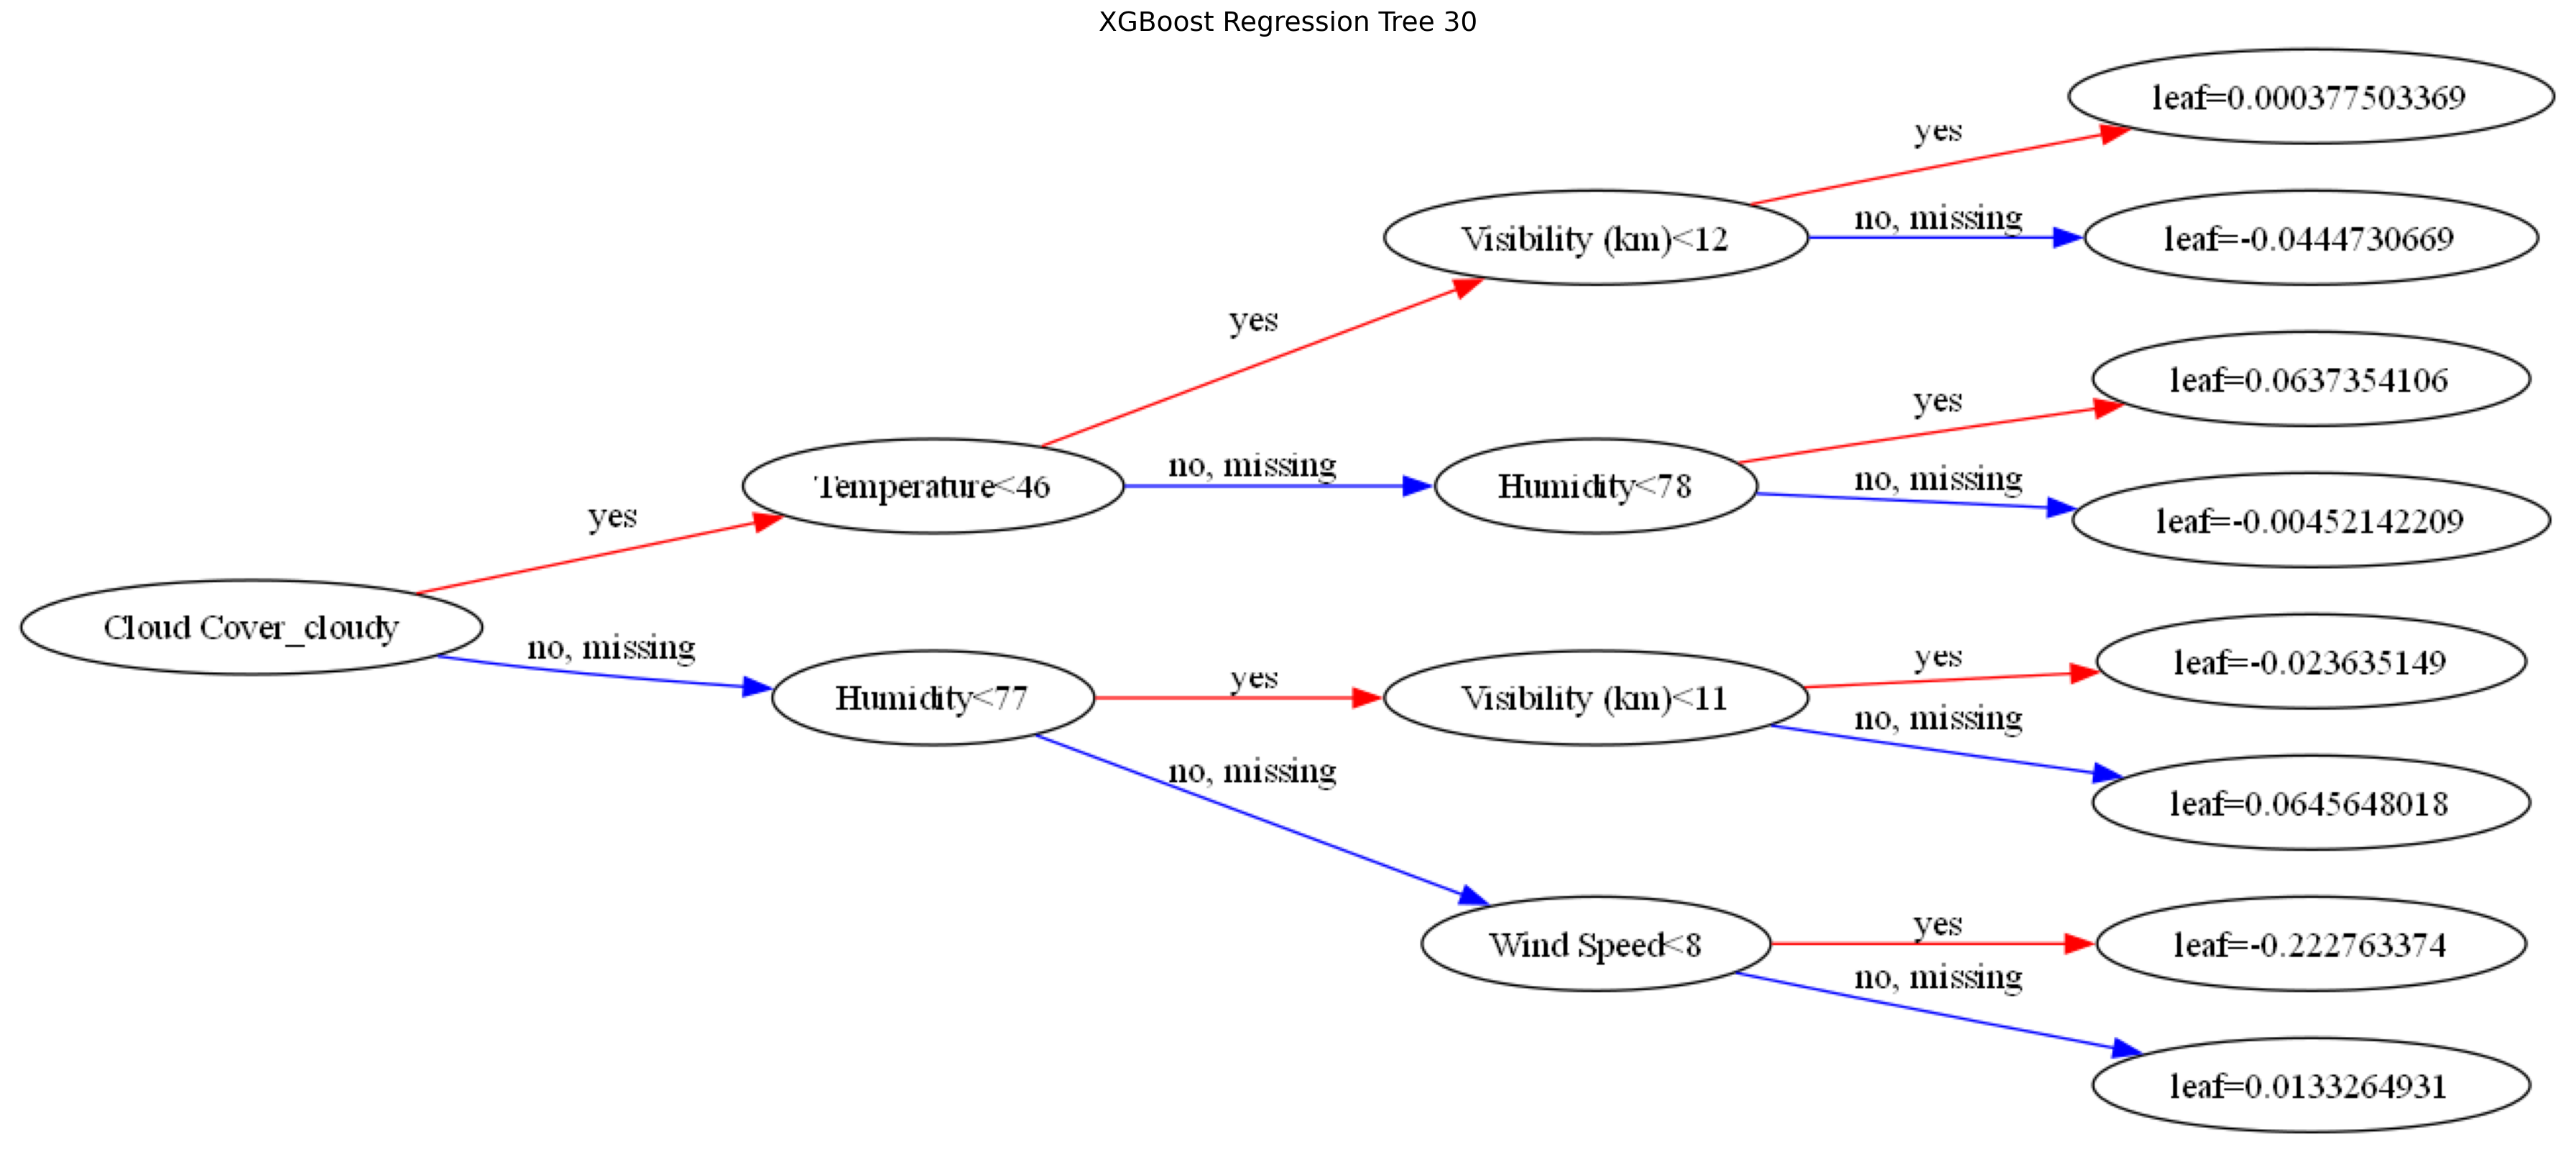

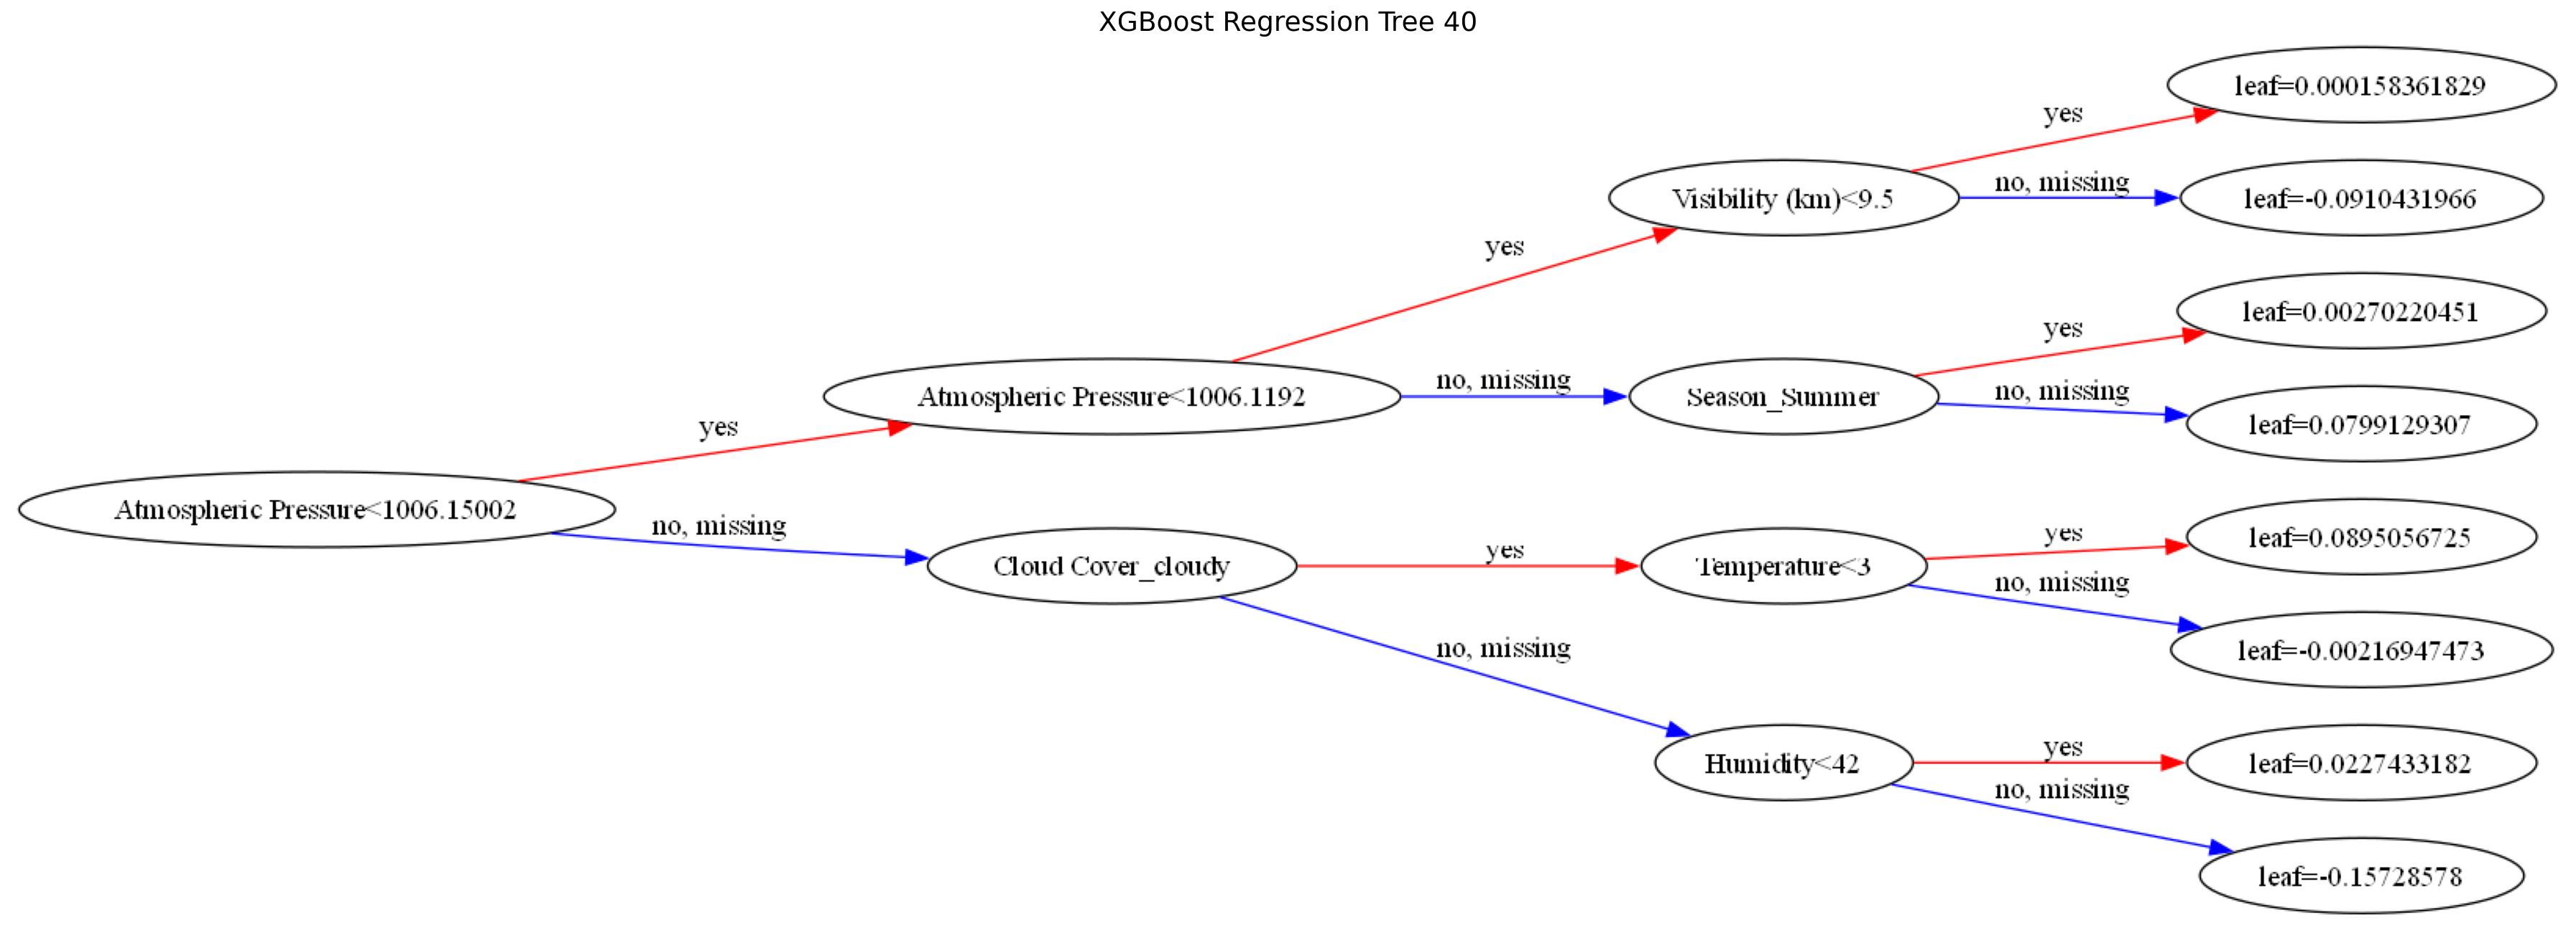

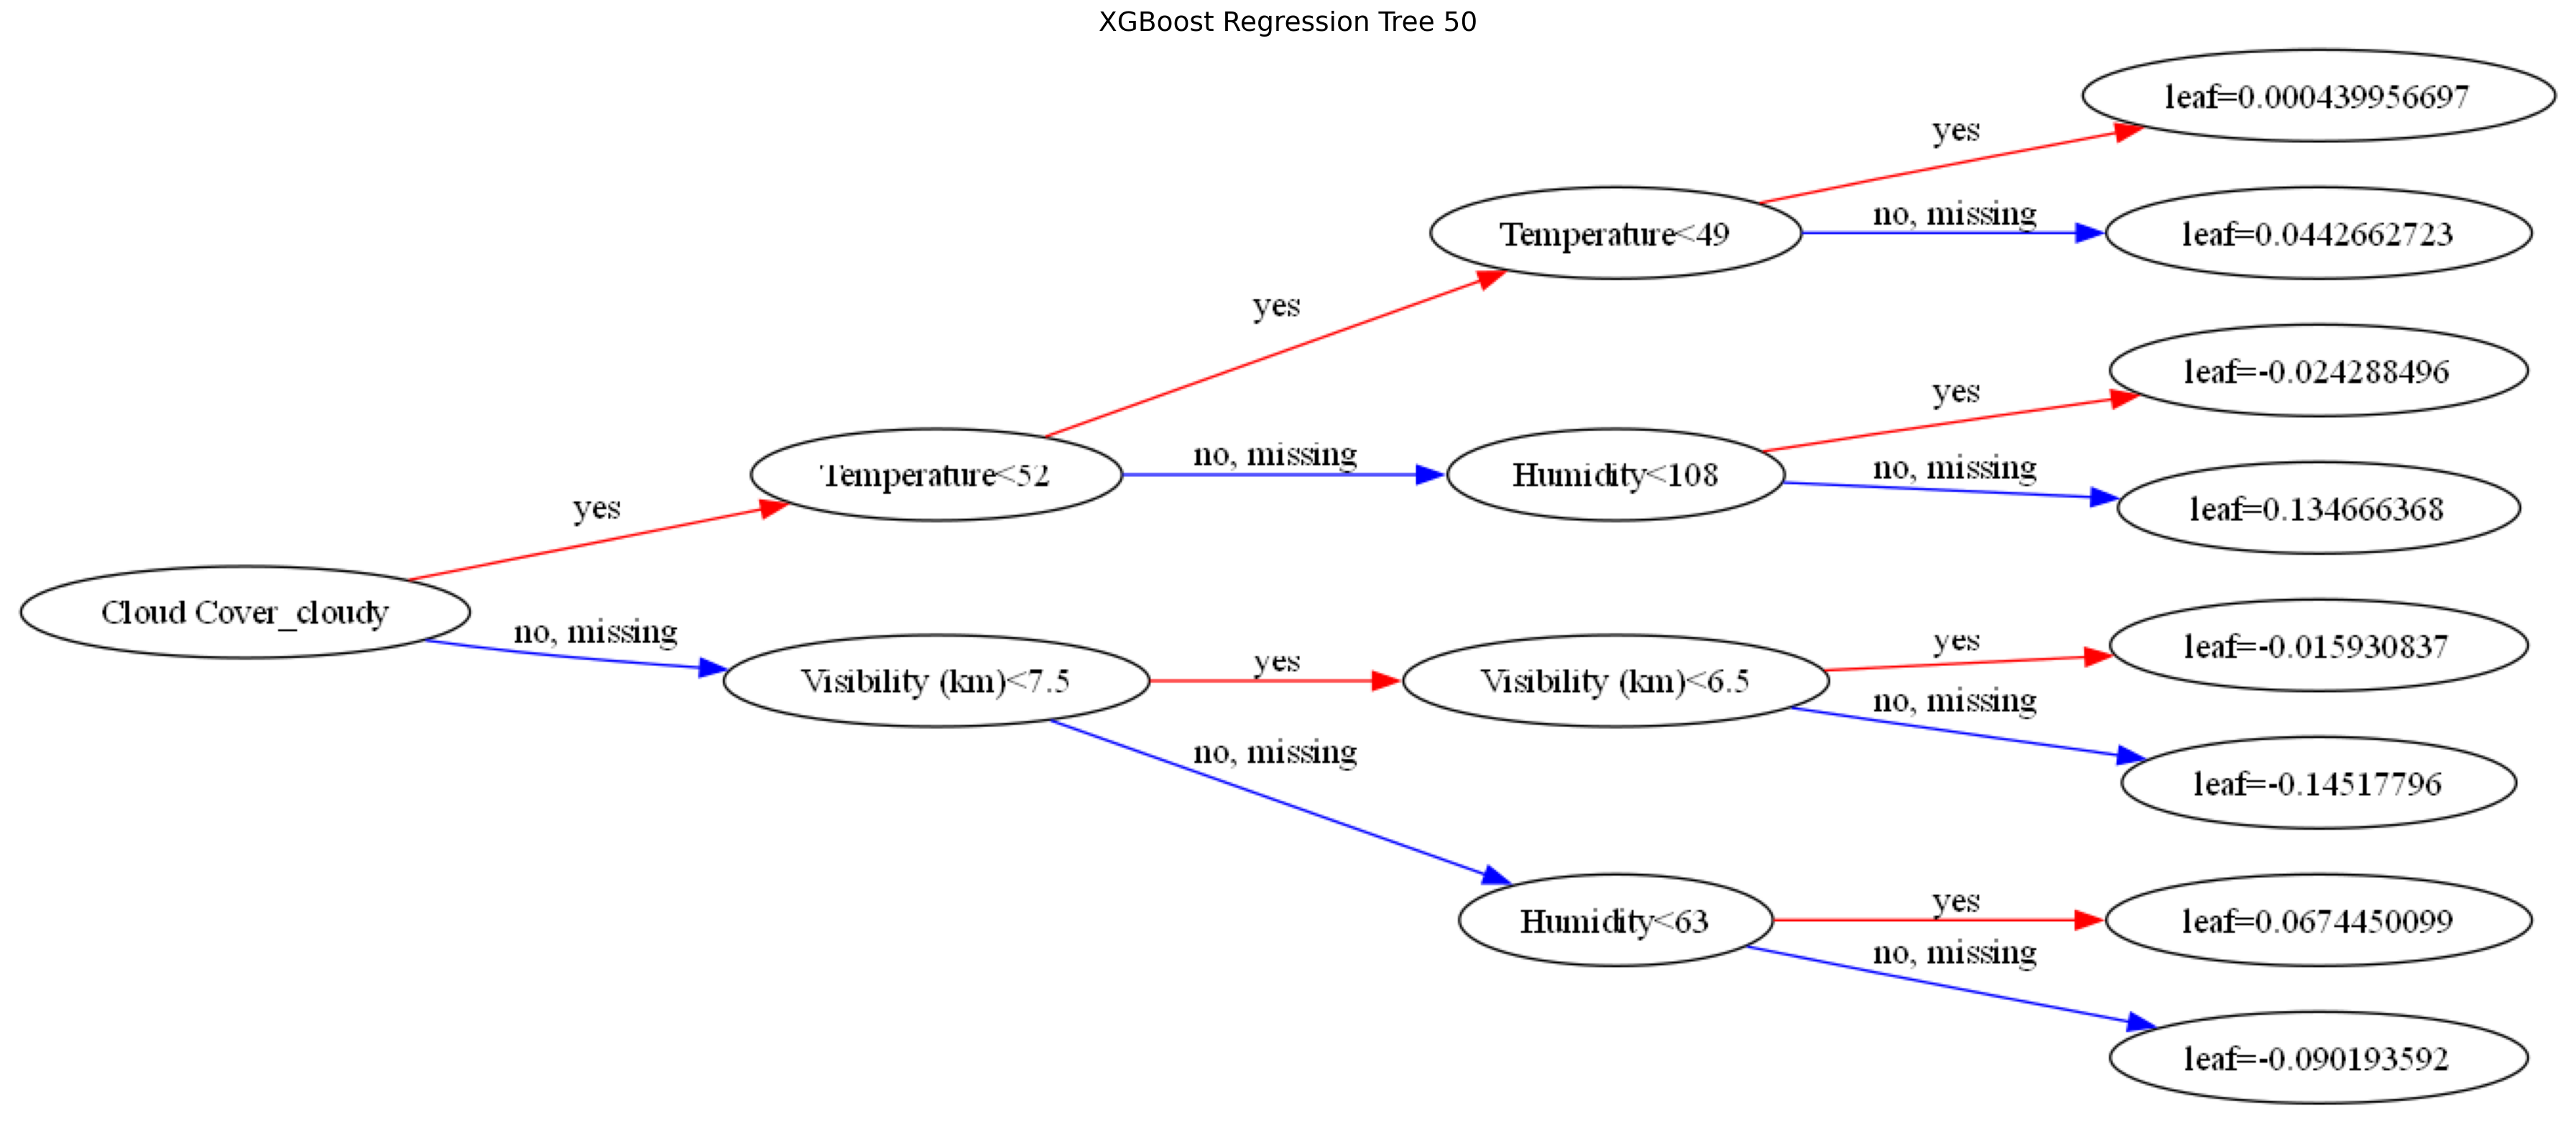

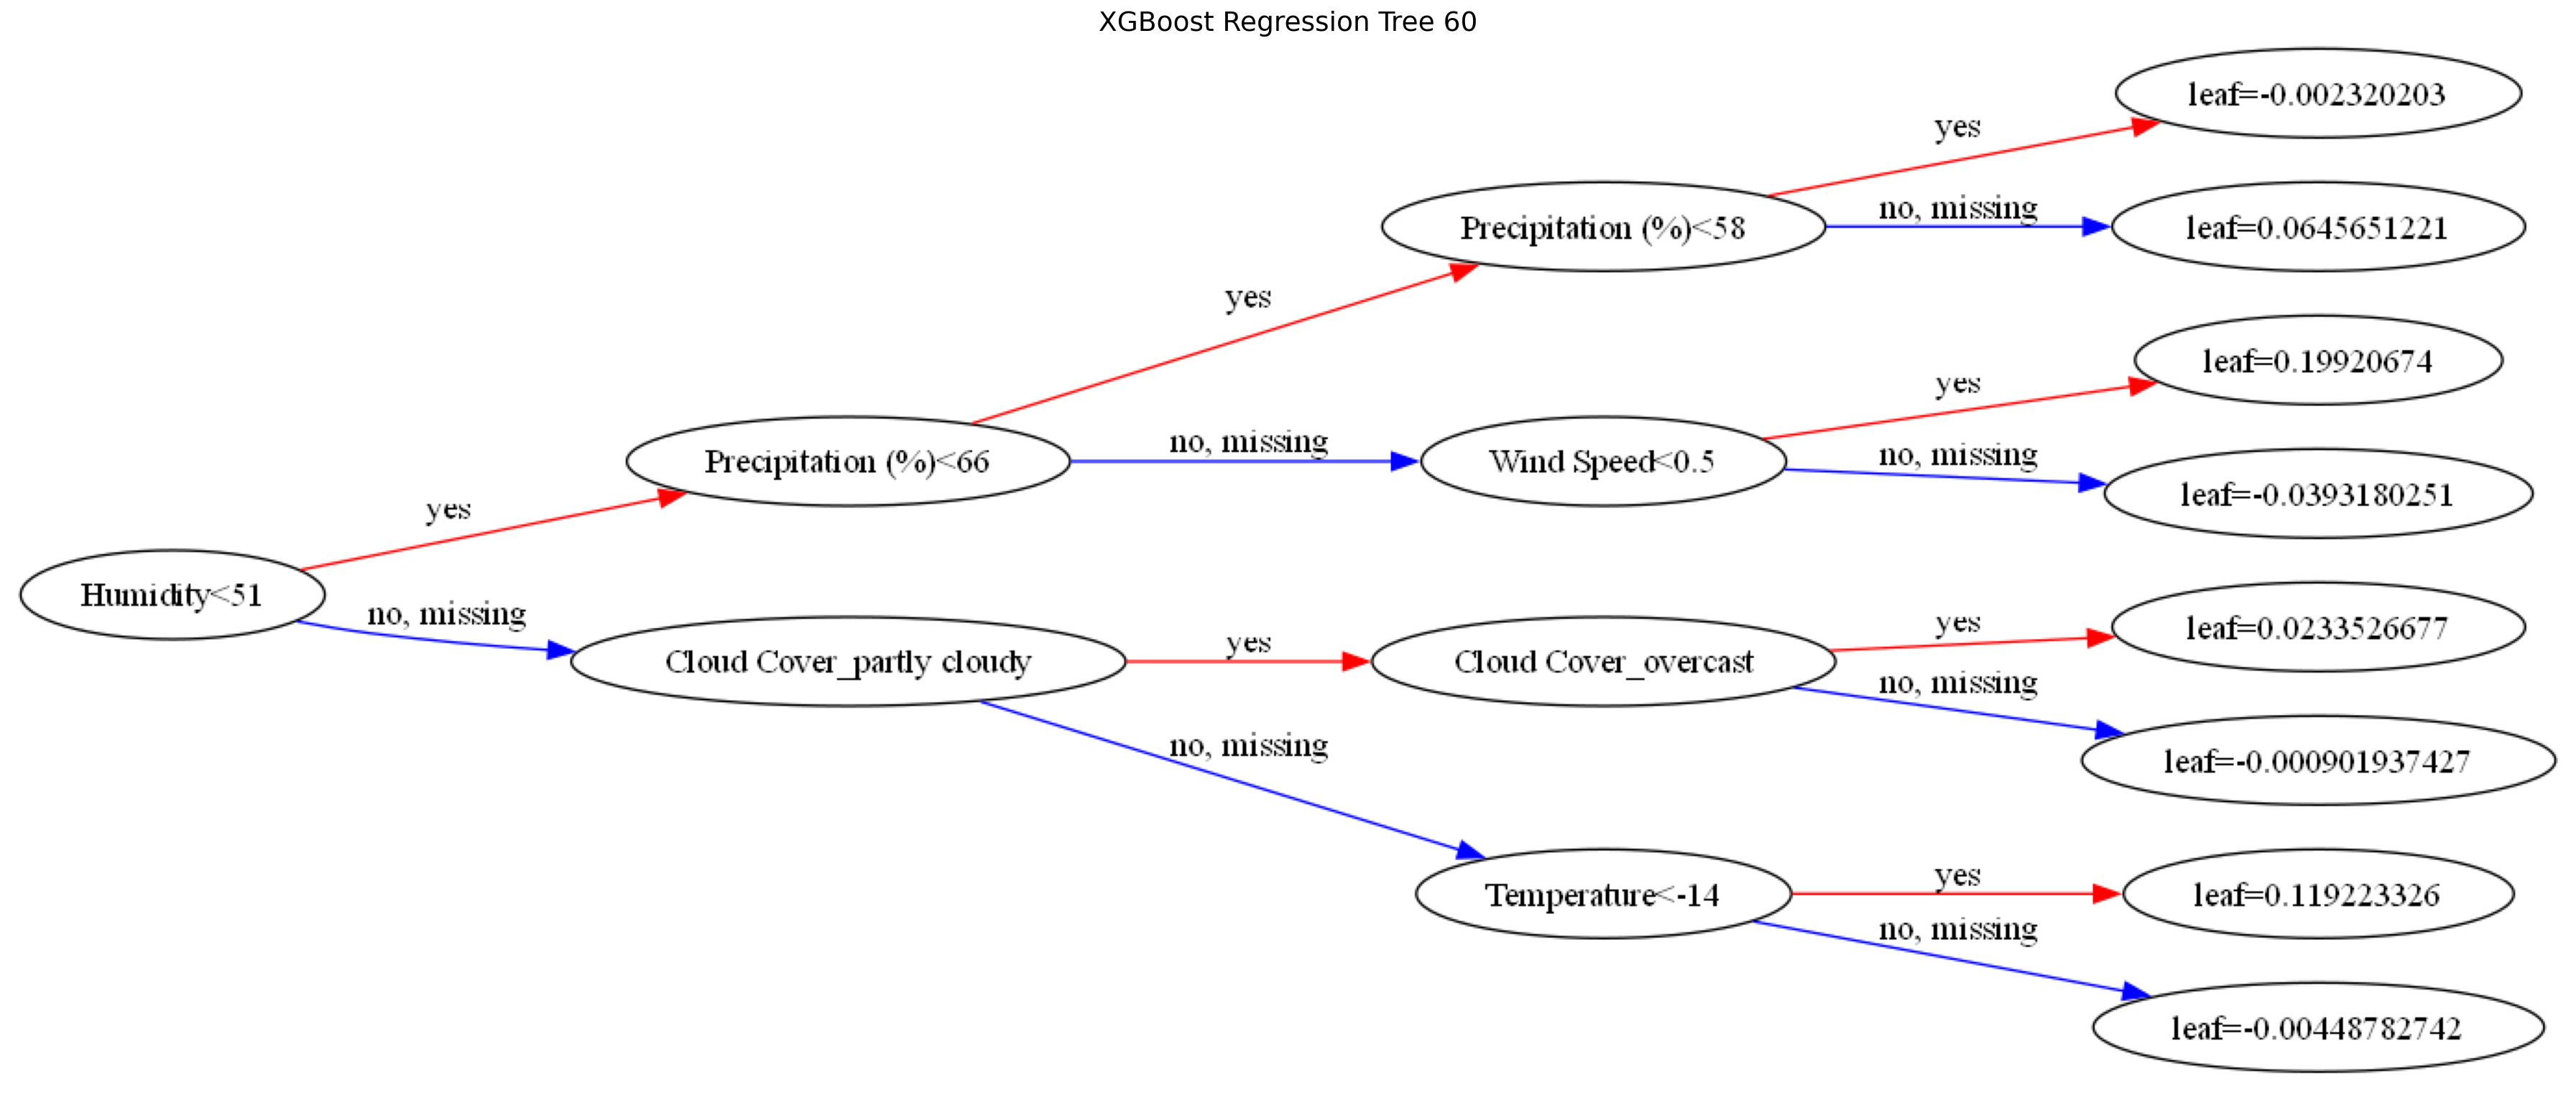

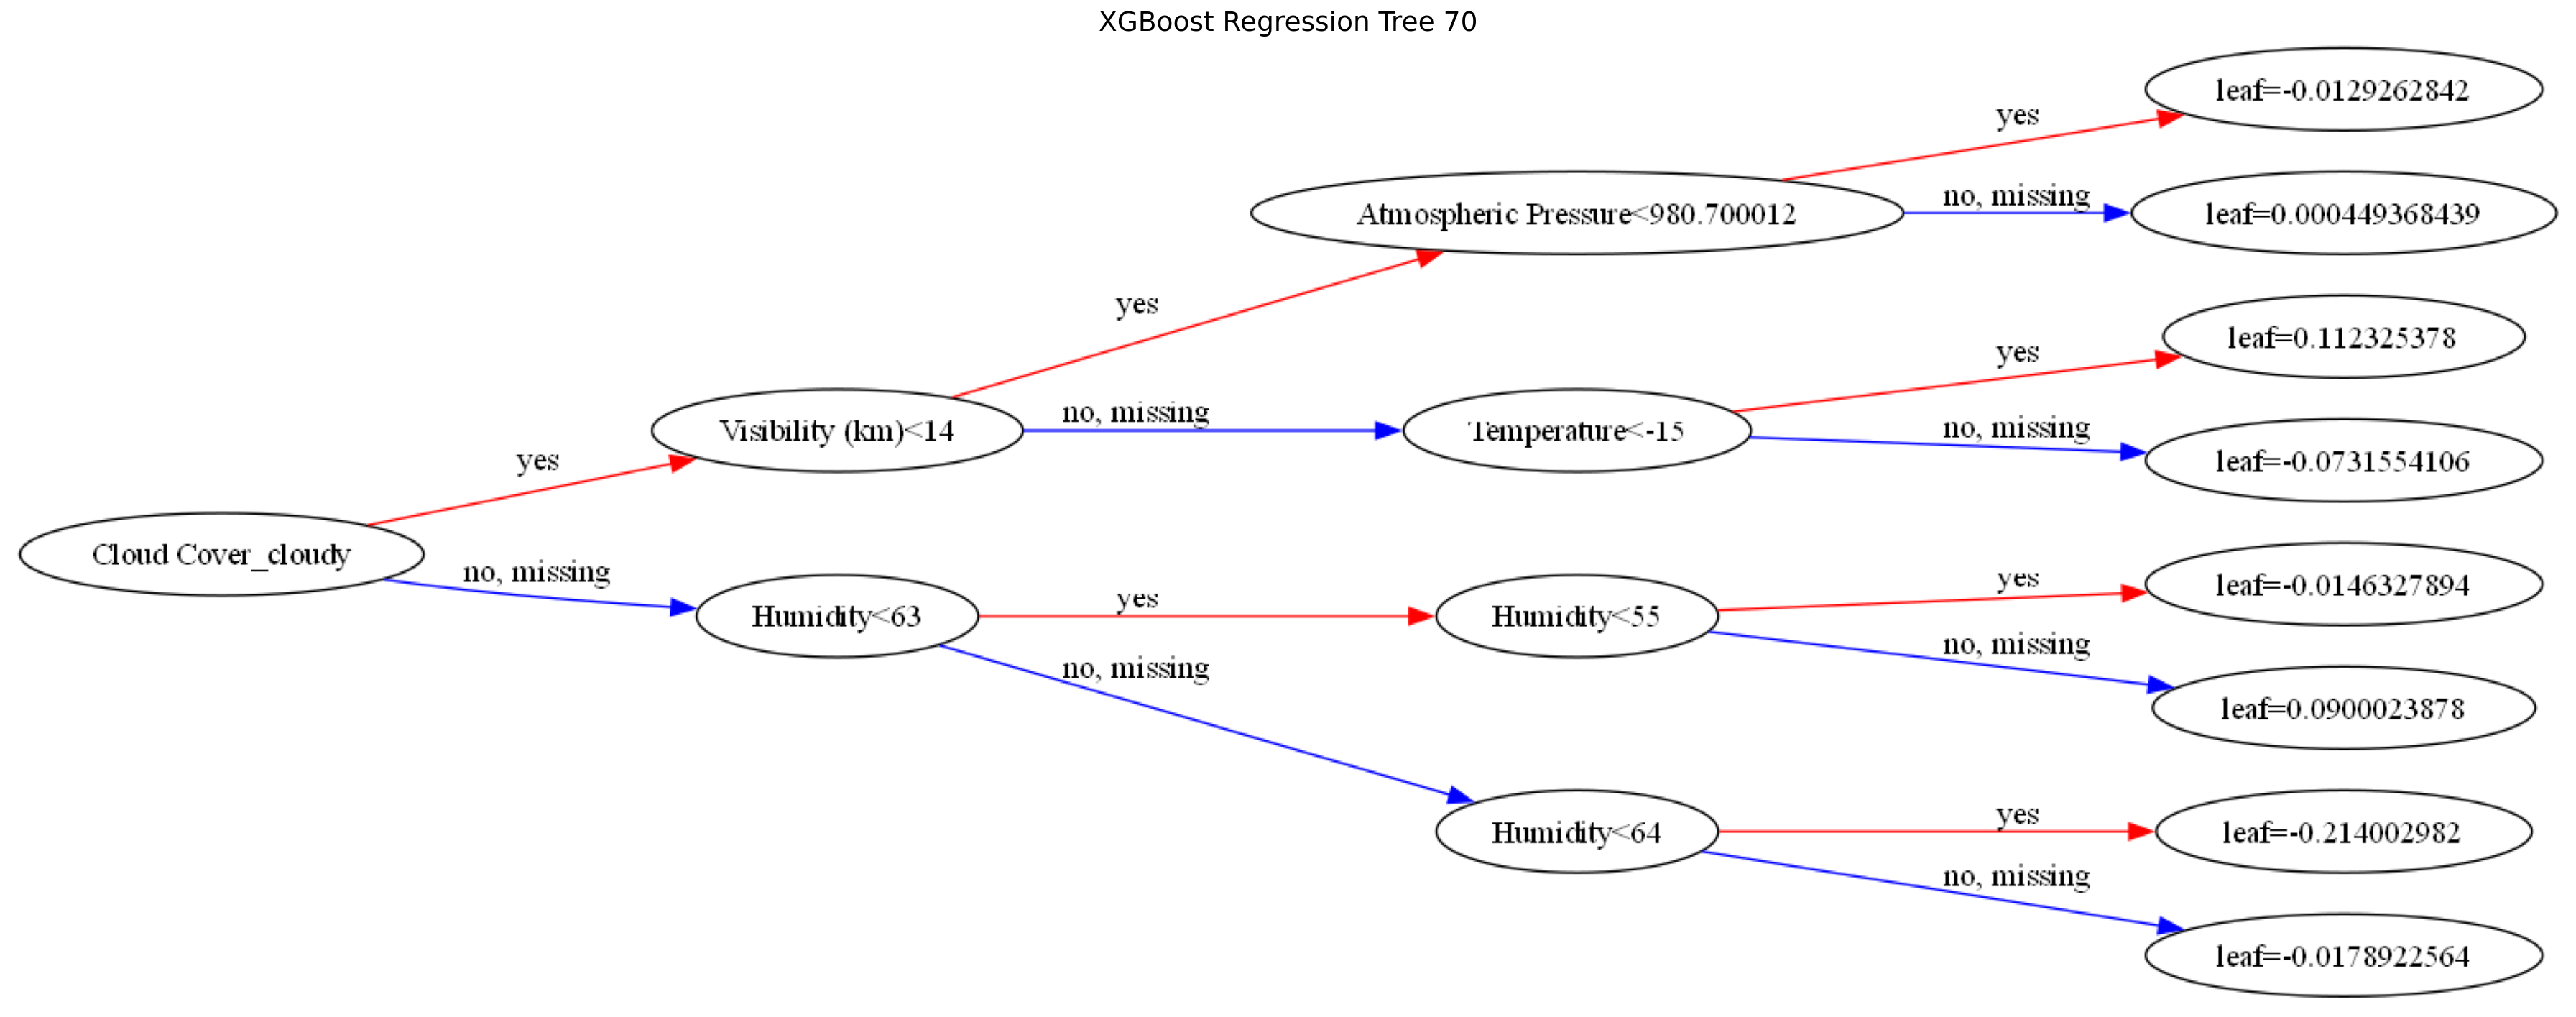

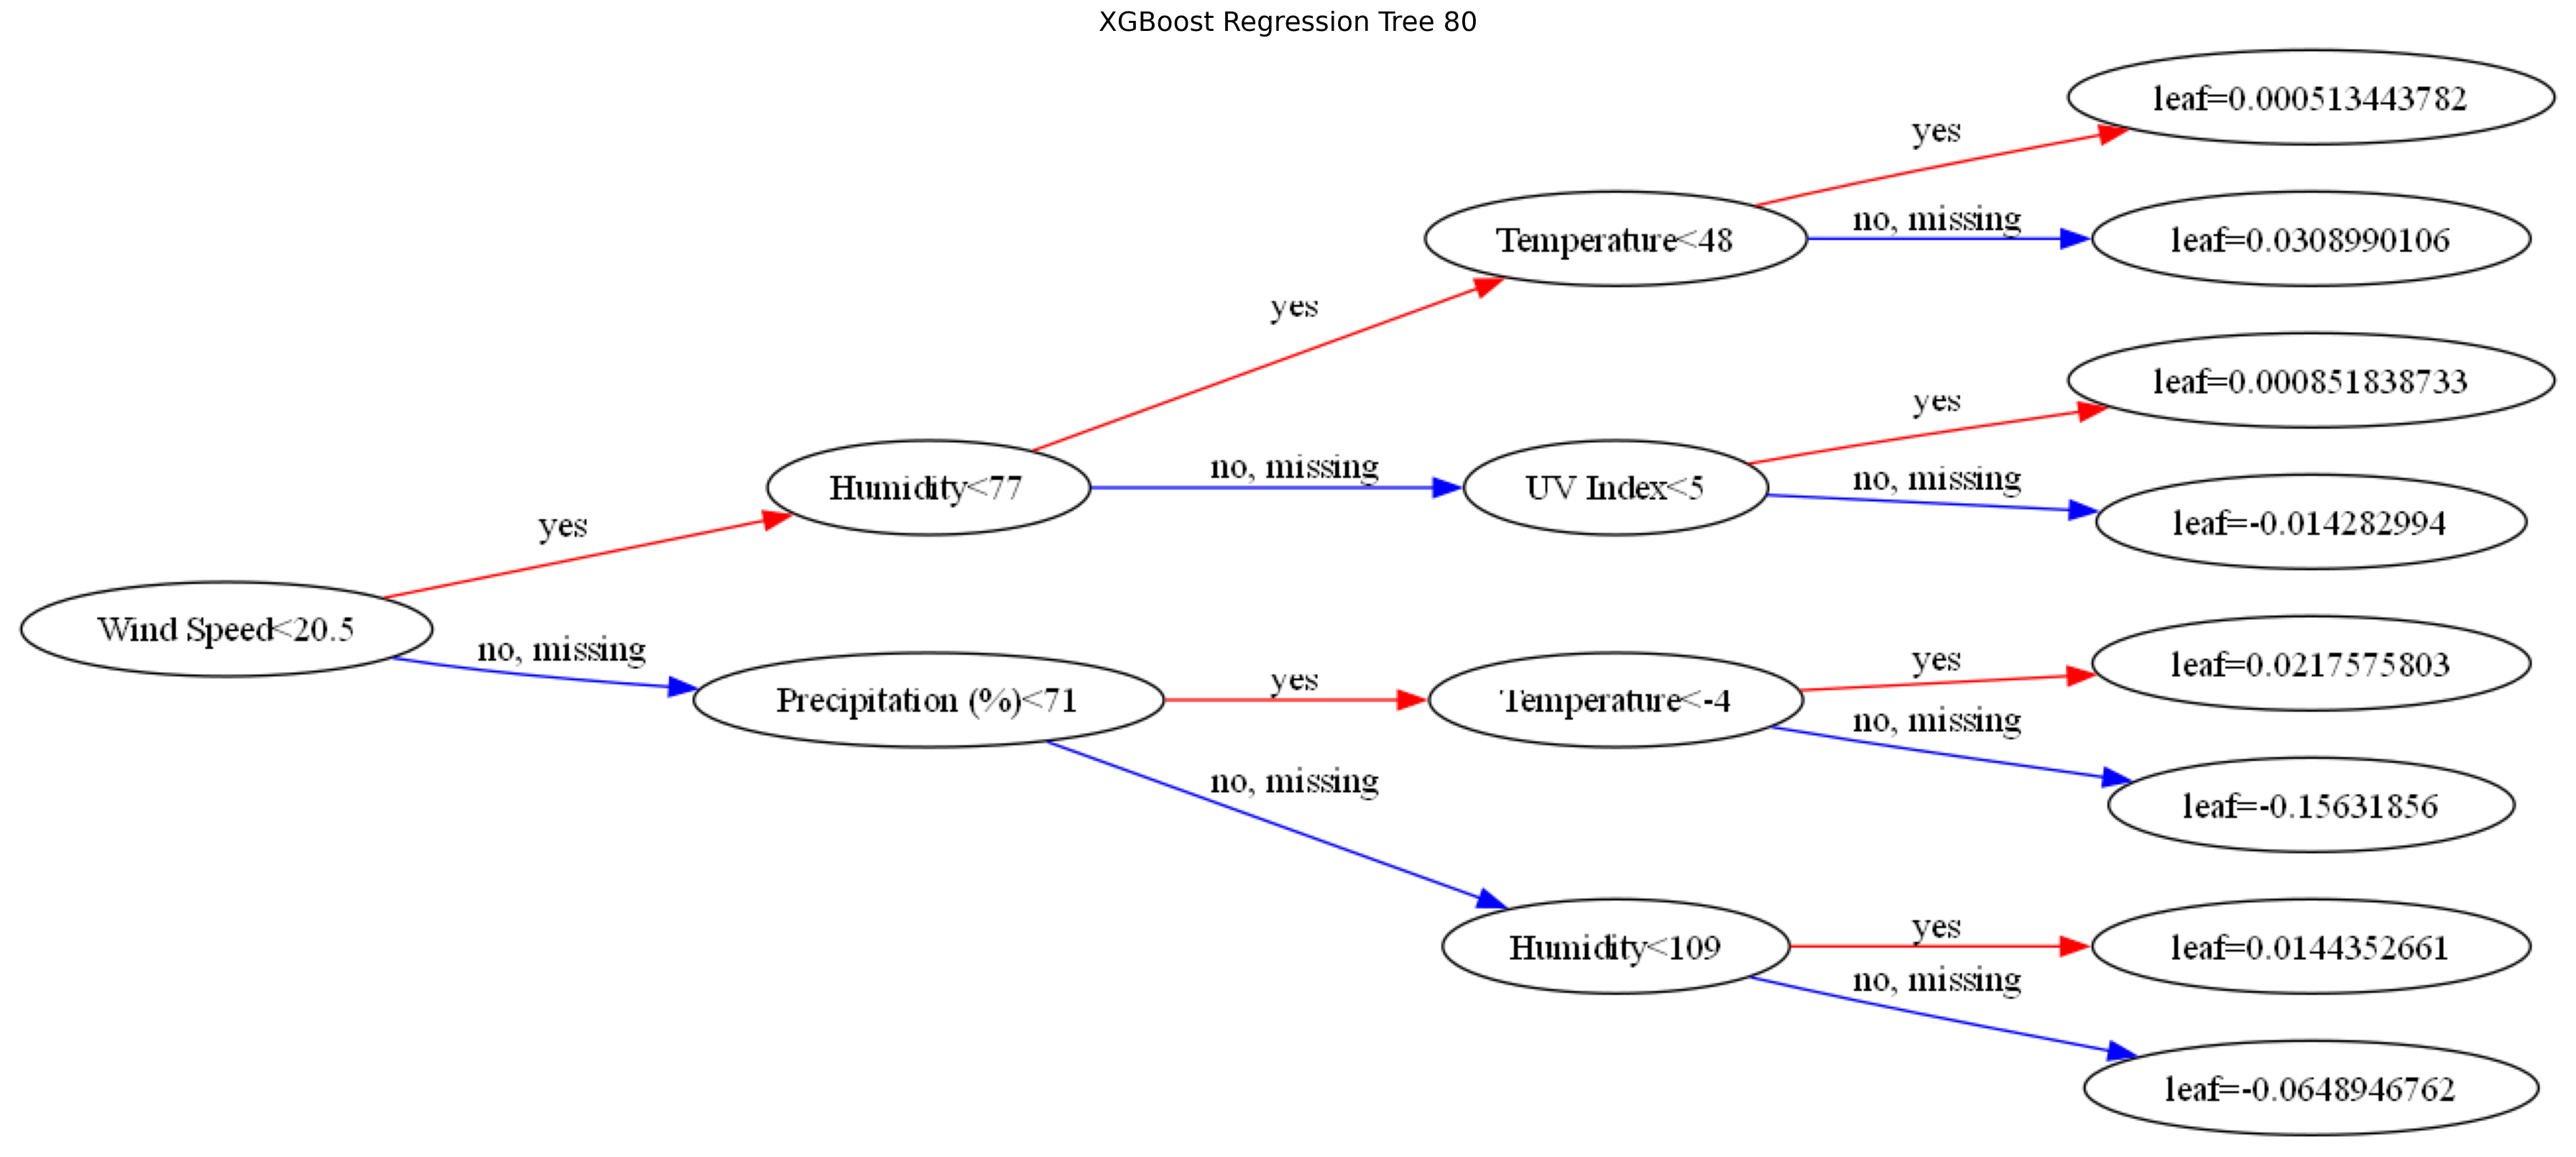

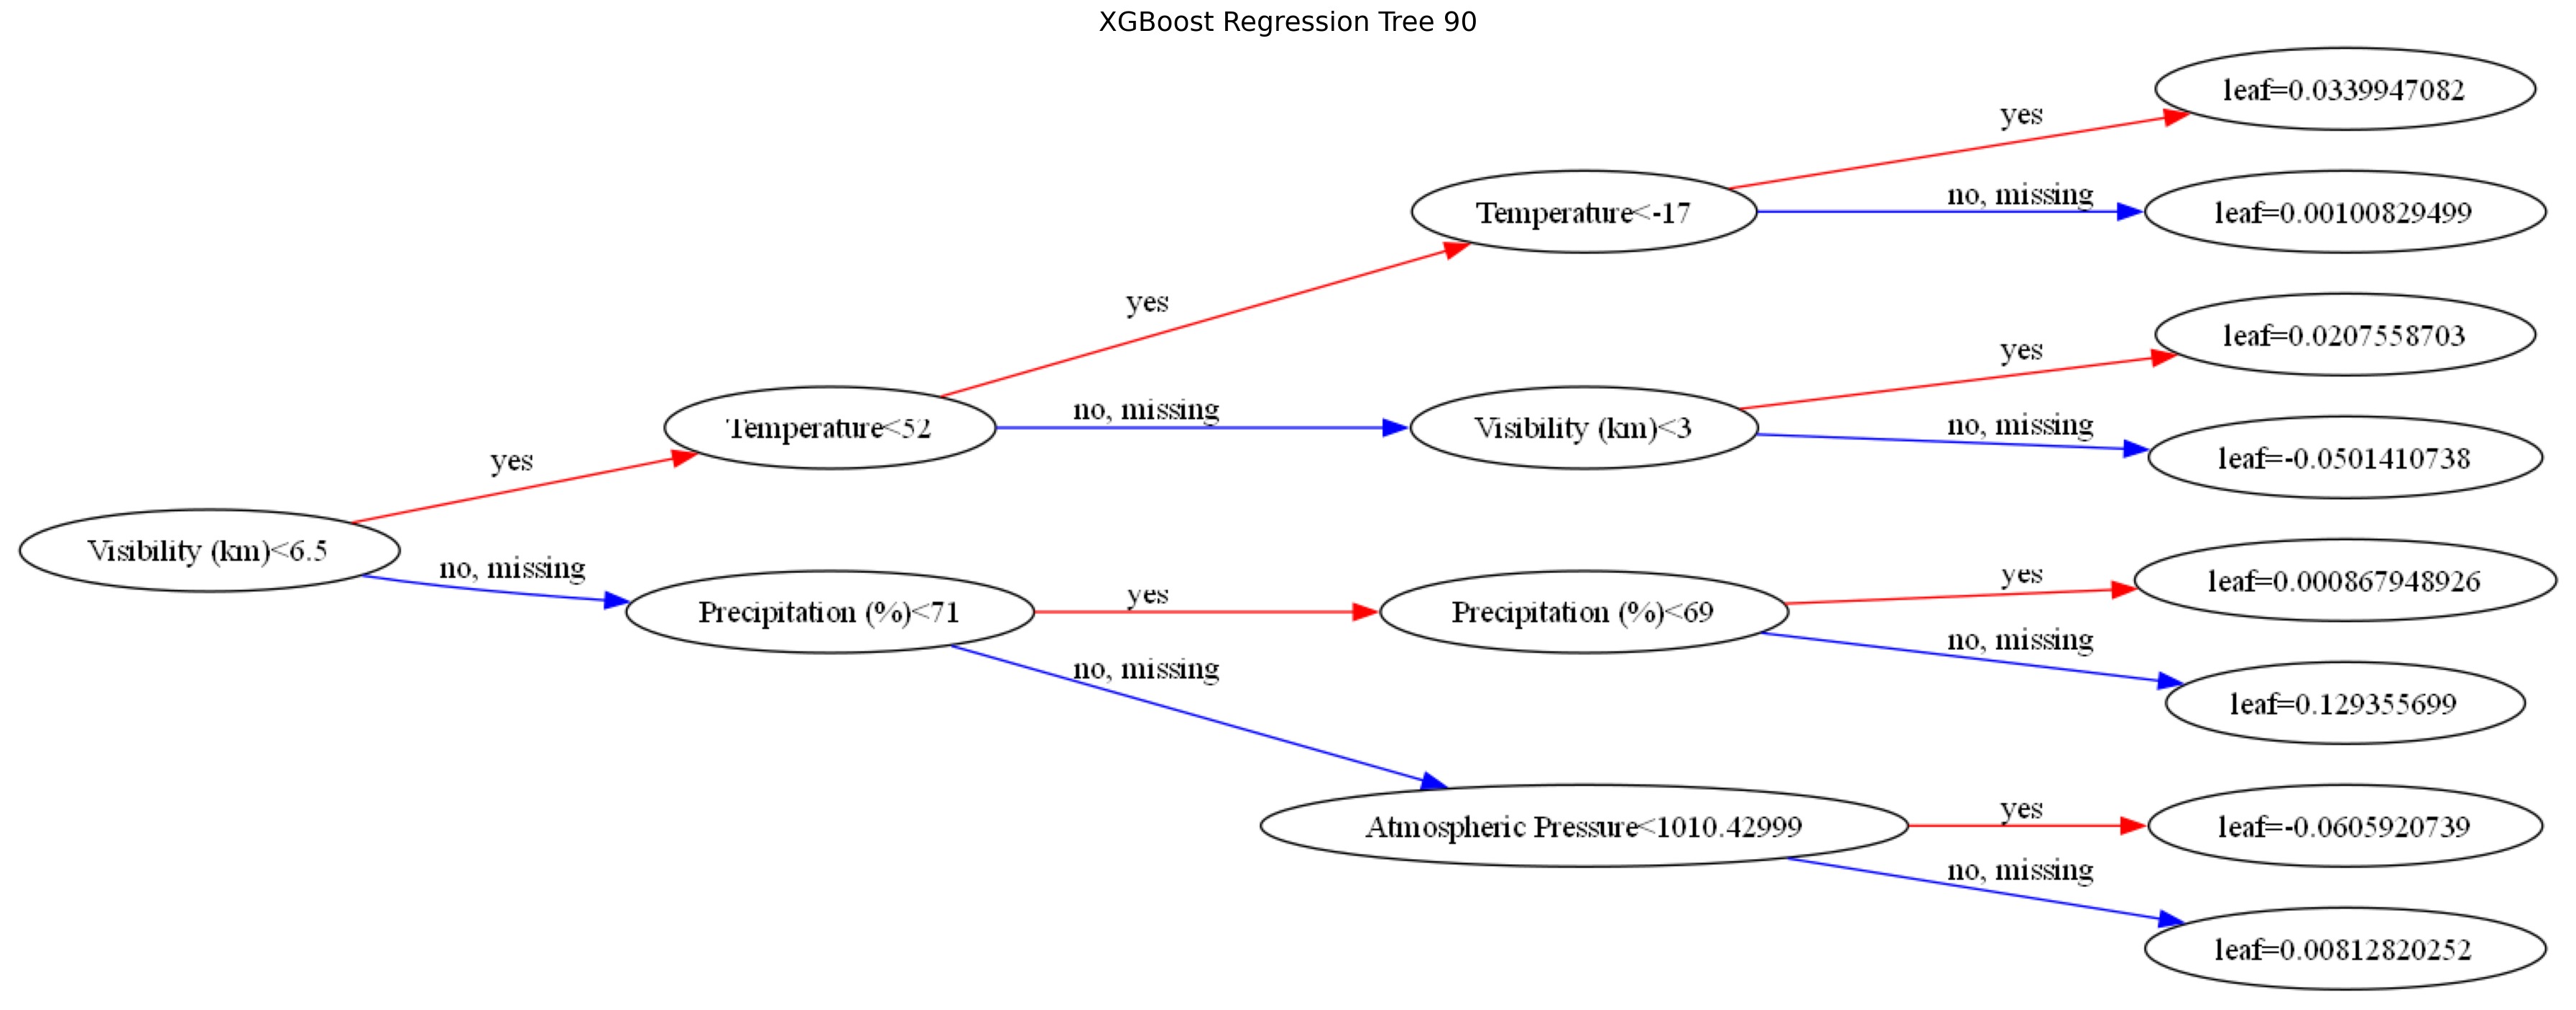

In [ ]:
# If you haven't installed xgboost, uncomment the next line:
# %pip install xgboost
from xgboost import XGBRegressor, plot_tree

# Initialize XGBoost regressor
xgb_reg = XGBRegressor(n_estimators=100, max_depth=3, random_state=314)

# Train the model
xgb_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_reg.predict(X_test)

# Calculate mean squared error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost regression mean squared error: {mse_xgb:.4f}")

# Round predictions to integer categories and calculate classification accuracy
y_pred_xgb_rounded = np.round(y_pred_xgb).astype(int)
acc_xgb = accuracy_score(y_test, y_pred_xgb_rounded)
print(f"XGBoost regression rounded classification accuracy: {acc_xgb:.4f}")

# Visualize prediction results
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, alpha=0.5, label='Actual')
plt.scatter(range(len(y_test)), y_pred_xgb, alpha=0.5, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Weather Type')
plt.title('XGBoost Regression Prediction Results')
plt.legend()
plt.show()

# Visualize some XGBoost tree structures (increase resolution and font size)
for i in range(0, 100, 10):
    fig, ax = plt.subplots(figsize=(24, 14), dpi=150)
    plot_tree(xgb_reg, num_trees=i, ax=ax, rankdir='LR')
    ax.set_title(f"XGBoost Regression Tree {i}", fontsize=18)
    plt.tight_layout()
    plt.show()

## Random Forest

Random Forest test set accuracy: 0.9128787878787878


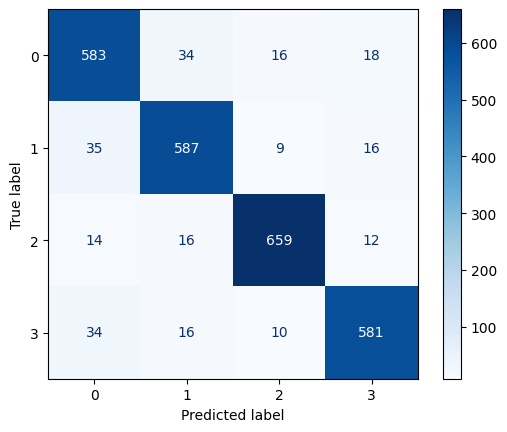

In [ ]:
# Random Forest analysis
rf_clf = RandomForestClassifier(random_state=314)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Output accuracy and confusion matrix
print("Random Forest test set accuracy:", accuracy_score(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_estimator(
    rf_clf, X_test, y_test, cmap=plt.cm.Blues
)
plt.show()

# Summary of Results and Model Application

## Data and Features
- The dataset contains 13,129 samples, with main features including temperature, humidity, wind speed, precipitation, pressure, UV index, visibility, cloud cover, season, and location.
- The target variable is Weather Type (encoded as numbers).

## Data Preprocessing
1. Outliers are removed using the `remove_outliers` function, and missing values are filled with the `replace_nulls` function.
2. Categorical variables are encoded using `LabelEncoder` and `get_dummies`, resulting in a feature matrix X and label y suitable for machine learning.
3. The dataset is split into training and test sets in an 8:2 ratio.

## Model Application and Results

1. **Decision Tree Classification (DecisionTreeClassifier)**  
    - Training accuracy: 1.0000, Test accuracy: 0.9059  
    - No obvious overfitting observed.  
    - Model structure and feature importance are visualized and analyzed.

2. **Grid Search (GridSearchCV) for Hyperparameter Tuning**  
    - Best parameters: {'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 2}  
    - Best cross-validation accuracy: 0.9080, Test accuracy: 0.9100  
    - Automated tuning improves model performance.

3. **Regression Tree (DecisionTreeRegressor)**  
    - MSE: 0.3705, R2: 0.7093  
    - Rounded classification accuracy: 0.9063  
    - Regression trees used for classification have slightly lower accuracy than dedicated classifiers.

4. **XGBoost Regression**  
    - MSE: 0.2146, Rounded classification accuracy: 0.8793  
    - Prediction results are visualized, and the model shows good generalization.

5. **Random Forest Classification (RandomForestClassifier)**  
    - Test accuracy: 0.9100  
    - The confusion matrix shows the model's ability to distinguish between classes.

## Conclusion
Multiple models can effectively predict weather types. Decision trees and random forests perform excellently, and XGBoost regression also achieves high accuracy. Through data cleaning, feature engineering, and hyperparameter tuning, model generalization is improved.